In [88]:
# Trabalho 1

# O problema será identificar se o sinal de sonar obtido (60 valores reais,
# correspondentes a energia em diferentes bandas de frequência e ângulos de retorno) representa
# uma rocha (“R”) ou uma mina (“M”)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report

In [8]:
train_df = pd.read_csv('sonar.train-data', header=None)
test_df  = pd.read_csv('sonar.test-data', header=None) 

In [9]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0264,0.0071,0.0342,0.0793,0.1043,0.0783,0.1417,0.1176,0.0453,0.0945,...,0.0214,0.0262,0.0177,0.0037,0.0068,0.0121,0.0077,0.0078,0.0066,M
1,0.0086,0.0215,0.0242,0.0445,0.0667,0.0771,0.0499,0.0906,0.1229,0.1185,...,0.0072,0.0054,0.0022,0.0016,0.0029,0.0058,0.0050,0.0024,0.0030,R
2,0.0394,0.0420,0.0446,0.0551,0.0597,0.1416,0.0956,0.0802,0.1618,0.2558,...,0.0146,0.0040,0.0114,0.0032,0.0062,0.0101,0.0068,0.0053,0.0087,M
3,0.0095,0.0308,0.0539,0.0411,0.0613,0.1039,0.1016,0.1394,0.2592,0.3745,...,0.0181,0.0019,0.0102,0.0133,0.0040,0.0042,0.0030,0.0031,0.0033,M
4,0.0310,0.0221,0.0433,0.0191,0.0964,0.1827,0.1106,0.1702,0.2804,0.4432,...,0.0204,0.0059,0.0053,0.0079,0.0037,0.0015,0.0056,0.0067,0.0054,M


In [10]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0363,0.0478,0.0298,0.0210,0.1409,0.1916,0.1349,0.1613,0.1703,0.1444,...,0.0115,0.0190,0.0055,0.0096,0.0050,0.0066,0.0114,0.0073,0.0033,M
1,0.0411,0.0277,0.0604,0.0525,0.0489,0.0385,0.0611,0.1117,0.1237,0.2300,...,0.0217,0.0038,0.0019,0.0065,0.0132,0.0108,0.0050,0.0085,0.0044,M
2,0.0132,0.0080,0.0188,0.0141,0.0436,0.0668,0.0609,0.0131,0.0899,0.0922,...,0.0044,0.0028,0.0021,0.0022,0.0048,0.0138,0.0140,0.0028,0.0064,R
3,0.0231,0.0315,0.0170,0.0226,0.0410,0.0116,0.0223,0.0805,0.2365,0.2461,...,0.0125,0.0036,0.0123,0.0043,0.0114,0.0052,0.0091,0.0008,0.0092,M
4,0.0015,0.0186,0.0289,0.0195,0.0515,0.0817,0.1005,0.0124,0.1168,0.1476,...,0.0108,0.0075,0.0089,0.0036,0.0029,0.0013,0.0010,0.0032,0.0047,M


In [11]:
# Replacing char values by numerical ones
cleanup_nums = {60: {"M": 1.0, "R": 0.0}}

train_df.replace(cleanup_nums, inplace=True)
test_df.replace(cleanup_nums, inplace=True)

print (train_df.head())
print (test_df.head())

       0       1       2       3       4       5       6       7       8   \
0  0.0264  0.0071  0.0342  0.0793  0.1043  0.0783  0.1417  0.1176  0.0453   
1  0.0086  0.0215  0.0242  0.0445  0.0667  0.0771  0.0499  0.0906  0.1229   
2  0.0394  0.0420  0.0446  0.0551  0.0597  0.1416  0.0956  0.0802  0.1618   
3  0.0095  0.0308  0.0539  0.0411  0.0613  0.1039  0.1016  0.1394  0.2592   
4  0.0310  0.0221  0.0433  0.0191  0.0964  0.1827  0.1106  0.1702  0.2804   

       9  ...       51      52      53      54      55      56      57  \
0  0.0945 ...   0.0214  0.0262  0.0177  0.0037  0.0068  0.0121  0.0077   
1  0.1185 ...   0.0072  0.0054  0.0022  0.0016  0.0029  0.0058  0.0050   
2  0.2558 ...   0.0146  0.0040  0.0114  0.0032  0.0062  0.0101  0.0068   
3  0.3745 ...   0.0181  0.0019  0.0102  0.0133  0.0040  0.0042  0.0030   
4  0.4432 ...   0.0204  0.0059  0.0053  0.0079  0.0037  0.0015  0.0056   

       58      59   60  
0  0.0078  0.0066  1.0  
1  0.0024  0.0030  0.0  
2  0.0053  0.0087

In [13]:
# Describing the database
#train_df[60].value_counts()
print(train_df.iloc[:,:-1].describe())
print(test_df.iloc[:,:-1].describe())


               0           1           2           3           4           5   \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     0.029547    0.037821    0.043738    0.054526    0.079002    0.110829   
std      0.022255    0.034114    0.039538    0.048730    0.059642    0.063264   
min      0.003600    0.000600    0.001500    0.006100    0.006700    0.010200   
25%      0.015100    0.014900    0.019100    0.027200    0.039700    0.069000   
50%      0.023300    0.030000    0.034200    0.044500    0.064700    0.092900   
75%      0.035300    0.047400    0.054700    0.062700    0.107000    0.145200   
max      0.131300    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8          9      ...              50  \
count  145.000000  145.000000  145.000000  145.00000     ...      145.000000   
mean     0.122453    0.135608    0.181346    0.21665     ...        0.016110   
std      0.060247    0.081476 

In [14]:
# 145 samples from train/validation dataframe(~70%) + 63 samples from test dataframe (~30%) =  208 samples
X_train = train_df.iloc[:,:-1].values   # Independent variables
y_train = train_df.iloc[:, -1].values   # Dependent variables (classes)

X_test = test_df.iloc[:,:-1].values     # Independent variables
y_test = test_df.iloc[:, -1].values     # Dependent variables (classes)
print ('X_train shape:', X_train.shape)
print ('y_train shape:', y_train.shape)
print ('X_test shape:', X_test.shape)
print ('y_test shape:', y_test.shape)
print(type(X_train))
print(type(y_train))
print(X_train)
print(y_train)

X_train shape: (145, 60)
y_train shape: (145,)
X_test shape: (63, 60)
y_test shape: (63,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[0.0264 0.0071 0.0342 ... 0.0077 0.0078 0.0066]
 [0.0086 0.0215 0.0242 ... 0.005  0.0024 0.003 ]
 [0.0394 0.042  0.0446 ... 0.0068 0.0053 0.0087]
 ...
 [0.0202 0.0104 0.0325 ... 0.0054 0.0073 0.0054]
 [0.0269 0.0383 0.0505 ... 0.0027 0.0055 0.0057]
 [0.0261 0.0266 0.0223 ... 0.0021 0.0028 0.0023]]
[1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 1.]


---

In [15]:
# Teste SVM
from sklearn import svm

SVM_clf = svm.SVC(gamma='scale').fit(X_train, y_train)
y_pred  = SVM_clf.predict(X_test)

In [16]:
# Confusion Matrix

cm      = confusion_matrix(y_test, y_pred)
#cr      = classification_report(y_test, y_pred)

print (cm)
#print (cr)

[[15 18]
 [ 1 29]]


---

Epoch 1 Error: 66.000 Accuracy: 54.483 (%)
Epoch 2 Error: 57.000 Accuracy: 60.690 (%)
Epoch 3 Error: 50.000 Accuracy: 65.517 (%)
Epoch 4 Error: 43.000 Accuracy: 70.345 (%)
Epoch 5 Error: 44.000 Accuracy: 69.655 (%)
Epoch 6 Error: 49.000 Accuracy: 66.207 (%)
Epoch 7 Error: 44.000 Accuracy: 69.655 (%)
Epoch 8 Error: 46.000 Accuracy: 68.276 (%)
Epoch 9 Error: 41.000 Accuracy: 71.724 (%)
Epoch 10 Error: 42.000 Accuracy: 71.034 (%)
Epoch 11 Error: 47.000 Accuracy: 67.586 (%)
Epoch 12 Error: 42.000 Accuracy: 71.034 (%)
Epoch 13 Error: 43.000 Accuracy: 70.345 (%)
Epoch 14 Error: 41.000 Accuracy: 71.724 (%)
Epoch 15 Error: 41.000 Accuracy: 71.724 (%)
Epoch 16 Error: 42.000 Accuracy: 71.034 (%)
Epoch 17 Error: 48.000 Accuracy: 66.897 (%)
Epoch 18 Error: 48.000 Accuracy: 66.897 (%)
Epoch 19 Error: 39.000 Accuracy: 73.103 (%)
Epoch 20 Error: 40.000 Accuracy: 72.414 (%)
Epoch 21 Error: 37.000 Accuracy: 74.483 (%)
Epoch 22 Error: 39.000 Accuracy: 73.103 (%)
Epoch 23 Error: 42.000 Accuracy: 71.034 (

Epoch 196 Error: 24.000 Accuracy: 83.448 (%)
Epoch 197 Error: 20.000 Accuracy: 86.207 (%)
Epoch 198 Error: 18.000 Accuracy: 87.586 (%)
Epoch 199 Error: 28.000 Accuracy: 80.690 (%)
Epoch 200 Error: 30.000 Accuracy: 79.310 (%)
Epoch 201 Error: 18.000 Accuracy: 87.586 (%)
Epoch 202 Error: 20.000 Accuracy: 86.207 (%)
Epoch 203 Error: 20.000 Accuracy: 86.207 (%)
Epoch 204 Error: 30.000 Accuracy: 79.310 (%)
Epoch 205 Error: 31.000 Accuracy: 78.621 (%)
Epoch 206 Error: 23.000 Accuracy: 84.138 (%)
Epoch 207 Error: 26.000 Accuracy: 82.069 (%)
Epoch 208 Error: 29.000 Accuracy: 80.000 (%)
Epoch 209 Error: 25.000 Accuracy: 82.759 (%)
Epoch 210 Error: 27.000 Accuracy: 81.379 (%)
Epoch 211 Error: 28.000 Accuracy: 80.690 (%)
Epoch 212 Error: 25.000 Accuracy: 82.759 (%)
Epoch 213 Error: 28.000 Accuracy: 80.690 (%)
Epoch 214 Error: 32.000 Accuracy: 77.931 (%)
Epoch 215 Error: 26.000 Accuracy: 82.069 (%)
Epoch 216 Error: 31.000 Accuracy: 78.621 (%)
Epoch 217 Error: 30.000 Accuracy: 79.310 (%)
Epoch 218 

Epoch 388 Error: 30.000 Accuracy: 79.310 (%)
Epoch 389 Error: 33.000 Accuracy: 77.241 (%)
Epoch 390 Error: 23.000 Accuracy: 84.138 (%)
Epoch 391 Error: 28.000 Accuracy: 80.690 (%)
Epoch 392 Error: 29.000 Accuracy: 80.000 (%)
Epoch 393 Error: 24.000 Accuracy: 83.448 (%)
Epoch 394 Error: 30.000 Accuracy: 79.310 (%)
Epoch 395 Error: 24.000 Accuracy: 83.448 (%)
Epoch 396 Error: 22.000 Accuracy: 84.828 (%)
Epoch 397 Error: 26.000 Accuracy: 82.069 (%)
Epoch 398 Error: 24.000 Accuracy: 83.448 (%)
Epoch 399 Error: 18.000 Accuracy: 87.586 (%)
Epoch 400 Error: 32.000 Accuracy: 77.931 (%)
Epoch 401 Error: 31.000 Accuracy: 78.621 (%)
Epoch 402 Error: 27.000 Accuracy: 81.379 (%)
Epoch 403 Error: 26.000 Accuracy: 82.069 (%)
Epoch 404 Error: 30.000 Accuracy: 79.310 (%)
Epoch 405 Error: 24.000 Accuracy: 83.448 (%)
Epoch 406 Error: 31.000 Accuracy: 78.621 (%)
Epoch 407 Error: 27.000 Accuracy: 81.379 (%)
Epoch 408 Error: 27.000 Accuracy: 81.379 (%)
Epoch 409 Error: 33.000 Accuracy: 77.241 (%)
Epoch 410 

Epoch 587 Error: 26.000 Accuracy: 82.069 (%)
Epoch 588 Error: 24.000 Accuracy: 83.448 (%)
Epoch 589 Error: 24.000 Accuracy: 83.448 (%)
Epoch 590 Error: 26.000 Accuracy: 82.069 (%)
Epoch 591 Error: 26.000 Accuracy: 82.069 (%)
Epoch 592 Error: 29.000 Accuracy: 80.000 (%)
Epoch 593 Error: 27.000 Accuracy: 81.379 (%)
Epoch 594 Error: 22.000 Accuracy: 84.828 (%)
Epoch 595 Error: 28.000 Accuracy: 80.690 (%)
Epoch 596 Error: 22.000 Accuracy: 84.828 (%)
Epoch 597 Error: 33.000 Accuracy: 77.241 (%)
Epoch 598 Error: 22.000 Accuracy: 84.828 (%)
Epoch 599 Error: 17.000 Accuracy: 88.276 (%)
Epoch 600 Error: 28.000 Accuracy: 80.690 (%)
Epoch 601 Error: 22.000 Accuracy: 84.828 (%)
Epoch 602 Error: 32.000 Accuracy: 77.931 (%)
Epoch 603 Error: 28.000 Accuracy: 80.690 (%)
Epoch 604 Error: 24.000 Accuracy: 83.448 (%)
Epoch 605 Error: 28.000 Accuracy: 80.690 (%)
Epoch 606 Error: 22.000 Accuracy: 84.828 (%)
Epoch 607 Error: 25.000 Accuracy: 82.759 (%)
Epoch 608 Error: 22.000 Accuracy: 84.828 (%)
Epoch 609 

Epoch 776 Error: 20.000 Accuracy: 86.207 (%)
Epoch 777 Error: 23.000 Accuracy: 84.138 (%)
Epoch 778 Error: 24.000 Accuracy: 83.448 (%)
Epoch 779 Error: 29.000 Accuracy: 80.000 (%)
Epoch 780 Error: 18.000 Accuracy: 87.586 (%)
Epoch 781 Error: 22.000 Accuracy: 84.828 (%)
Epoch 782 Error: 29.000 Accuracy: 80.000 (%)
Epoch 783 Error: 22.000 Accuracy: 84.828 (%)
Epoch 784 Error: 20.000 Accuracy: 86.207 (%)
Epoch 785 Error: 22.000 Accuracy: 84.828 (%)
Epoch 786 Error: 23.000 Accuracy: 84.138 (%)
Epoch 787 Error: 23.000 Accuracy: 84.138 (%)
Epoch 788 Error: 25.000 Accuracy: 82.759 (%)
Epoch 789 Error: 28.000 Accuracy: 80.690 (%)
Epoch 790 Error: 28.000 Accuracy: 80.690 (%)
Epoch 791 Error: 24.000 Accuracy: 83.448 (%)
Epoch 792 Error: 22.000 Accuracy: 84.828 (%)
Epoch 793 Error: 22.000 Accuracy: 84.828 (%)
Epoch 794 Error: 21.000 Accuracy: 85.517 (%)
Epoch 795 Error: 24.000 Accuracy: 83.448 (%)
Epoch 796 Error: 19.000 Accuracy: 86.897 (%)
Epoch 797 Error: 24.000 Accuracy: 83.448 (%)
Epoch 798 

Epoch 970 Error: 19.000 Accuracy: 86.897 (%)
Epoch 971 Error: 18.000 Accuracy: 87.586 (%)
Epoch 972 Error: 16.000 Accuracy: 88.966 (%)
Epoch 973 Error: 17.000 Accuracy: 88.276 (%)
Epoch 974 Error: 27.000 Accuracy: 81.379 (%)
Epoch 975 Error: 21.000 Accuracy: 85.517 (%)
Epoch 976 Error: 24.000 Accuracy: 83.448 (%)
Epoch 977 Error: 28.000 Accuracy: 80.690 (%)
Epoch 978 Error: 22.000 Accuracy: 84.828 (%)
Epoch 979 Error: 23.000 Accuracy: 84.138 (%)
Epoch 980 Error: 18.000 Accuracy: 87.586 (%)
Epoch 981 Error: 23.000 Accuracy: 84.138 (%)
Epoch 982 Error: 24.000 Accuracy: 83.448 (%)
Epoch 983 Error: 26.000 Accuracy: 82.069 (%)
Epoch 984 Error: 18.000 Accuracy: 87.586 (%)
Epoch 985 Error: 17.000 Accuracy: 88.276 (%)
Epoch 986 Error: 24.000 Accuracy: 83.448 (%)
Epoch 987 Error: 22.000 Accuracy: 84.828 (%)
Epoch 988 Error: 27.000 Accuracy: 81.379 (%)
Epoch 989 Error: 23.000 Accuracy: 84.138 (%)
Epoch 990 Error: 28.000 Accuracy: 80.690 (%)
Epoch 991 Error: 28.000 Accuracy: 80.690 (%)
Epoch 992 

Epoch 1157 Error: 28.000 Accuracy: 80.690 (%)
Epoch 1158 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1159 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1160 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1161 Error: 21.000 Accuracy: 85.517 (%)
Epoch 1162 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1163 Error: 28.000 Accuracy: 80.690 (%)
Epoch 1164 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1165 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1166 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1167 Error: 17.000 Accuracy: 88.276 (%)
Epoch 1168 Error: 21.000 Accuracy: 85.517 (%)
Epoch 1169 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1170 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1171 Error: 28.000 Accuracy: 80.690 (%)
Epoch 1172 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1173 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1174 Error: 30.000 Accuracy: 79.310 (%)
Epoch 1175 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1176 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1177 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1178 Error: 20.000 Accuracy:

Epoch 1353 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1354 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1355 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1356 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1357 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1358 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1359 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1360 Error: 28.000 Accuracy: 80.690 (%)
Epoch 1361 Error: 19.000 Accuracy: 86.897 (%)
Epoch 1362 Error: 16.000 Accuracy: 88.966 (%)
Epoch 1363 Error: 16.000 Accuracy: 88.966 (%)
Epoch 1364 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1365 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1366 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1367 Error: 19.000 Accuracy: 86.897 (%)
Epoch 1368 Error: 21.000 Accuracy: 85.517 (%)
Epoch 1369 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1370 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1371 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1372 Error: 16.000 Accuracy: 88.966 (%)
Epoch 1373 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1374 Error: 28.000 Accuracy:

Epoch 1541 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1542 Error: 17.000 Accuracy: 88.276 (%)
Epoch 1543 Error: 19.000 Accuracy: 86.897 (%)
Epoch 1544 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1545 Error: 26.000 Accuracy: 82.069 (%)
Epoch 1546 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1547 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1548 Error: 16.000 Accuracy: 88.966 (%)
Epoch 1549 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1550 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1551 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1552 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1553 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1554 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1555 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1556 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1557 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1558 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1559 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1560 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1561 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1562 Error: 22.000 Accuracy:

Epoch 1731 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1732 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1733 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1734 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1735 Error: 23.000 Accuracy: 84.138 (%)
Epoch 1736 Error: 16.000 Accuracy: 88.966 (%)
Epoch 1737 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1738 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1739 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1740 Error: 16.000 Accuracy: 88.966 (%)
Epoch 1741 Error: 16.000 Accuracy: 88.966 (%)
Epoch 1742 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1743 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1744 Error: 14.000 Accuracy: 90.345 (%)
Epoch 1745 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1746 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1747 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1748 Error: 22.000 Accuracy: 84.828 (%)
Epoch 1749 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1750 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1751 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1752 Error: 26.000 Accuracy:

Epoch 1915 Error: 19.000 Accuracy: 86.897 (%)
Epoch 1916 Error: 21.000 Accuracy: 85.517 (%)
Epoch 1917 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1918 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1919 Error: 17.000 Accuracy: 88.276 (%)
Epoch 1920 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1921 Error: 14.000 Accuracy: 90.345 (%)
Epoch 1922 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1923 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1924 Error: 17.000 Accuracy: 88.276 (%)
Epoch 1925 Error: 23.000 Accuracy: 84.138 (%)
Epoch 1926 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1927 Error: 20.000 Accuracy: 86.207 (%)
Epoch 1928 Error: 18.000 Accuracy: 87.586 (%)
Epoch 1929 Error: 17.000 Accuracy: 88.276 (%)
Epoch 1930 Error: 21.000 Accuracy: 85.517 (%)
Epoch 1931 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1932 Error: 17.000 Accuracy: 88.276 (%)
Epoch 1933 Error: 17.000 Accuracy: 88.276 (%)
Epoch 1934 Error: 24.000 Accuracy: 83.448 (%)
Epoch 1935 Error: 19.000 Accuracy: 86.897 (%)
Epoch 1936 Error: 20.000 Accuracy:

Epoch 2109 Error: 24.000 Accuracy: 83.448 (%)
Epoch 2110 Error: 20.000 Accuracy: 86.207 (%)
Epoch 2111 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2112 Error: 15.000 Accuracy: 89.655 (%)
Epoch 2113 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2114 Error: 20.000 Accuracy: 86.207 (%)
Epoch 2115 Error: 22.000 Accuracy: 84.828 (%)
Epoch 2116 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2117 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2118 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2119 Error: 20.000 Accuracy: 86.207 (%)
Epoch 2120 Error: 13.000 Accuracy: 91.034 (%)
Epoch 2121 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2122 Error: 23.000 Accuracy: 84.138 (%)
Epoch 2123 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2124 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2125 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2126 Error: 22.000 Accuracy: 84.828 (%)
Epoch 2127 Error: 28.000 Accuracy: 80.690 (%)
Epoch 2128 Error: 21.000 Accuracy: 85.517 (%)
Epoch 2129 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2130 Error: 22.000 Accuracy:

Epoch 2297 Error: 22.000 Accuracy: 84.828 (%)
Epoch 2298 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2299 Error: 15.000 Accuracy: 89.655 (%)
Epoch 2300 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2301 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2302 Error: 20.000 Accuracy: 86.207 (%)
Epoch 2303 Error: 23.000 Accuracy: 84.138 (%)
Epoch 2304 Error: 20.000 Accuracy: 86.207 (%)
Epoch 2305 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2306 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2307 Error: 21.000 Accuracy: 85.517 (%)
Epoch 2308 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2309 Error: 21.000 Accuracy: 85.517 (%)
Epoch 2310 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2311 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2312 Error: 22.000 Accuracy: 84.828 (%)
Epoch 2313 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2314 Error: 26.000 Accuracy: 82.069 (%)
Epoch 2315 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2316 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2317 Error: 15.000 Accuracy: 89.655 (%)
Epoch 2318 Error: 14.000 Accuracy:

Epoch 2485 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2486 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2487 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2488 Error: 15.000 Accuracy: 89.655 (%)
Epoch 2489 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2490 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2491 Error: 23.000 Accuracy: 84.138 (%)
Epoch 2492 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2493 Error: 21.000 Accuracy: 85.517 (%)
Epoch 2494 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2495 Error: 15.000 Accuracy: 89.655 (%)
Epoch 2496 Error: 24.000 Accuracy: 83.448 (%)
Epoch 2497 Error: 22.000 Accuracy: 84.828 (%)
Epoch 2498 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2499 Error: 25.000 Accuracy: 82.759 (%)
Epoch 2500 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2501 Error: 20.000 Accuracy: 86.207 (%)
Epoch 2502 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2503 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2504 Error: 24.000 Accuracy: 83.448 (%)
Epoch 2505 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2506 Error: 19.000 Accuracy:

Epoch 2673 Error: 24.000 Accuracy: 83.448 (%)
Epoch 2674 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2675 Error: 12.000 Accuracy: 91.724 (%)
Epoch 2676 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2677 Error: 8.000 Accuracy: 94.483 (%)
Epoch 2678 Error: 12.000 Accuracy: 91.724 (%)
Epoch 2679 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2680 Error: 12.000 Accuracy: 91.724 (%)
Epoch 2681 Error: 12.000 Accuracy: 91.724 (%)
Epoch 2682 Error: 12.000 Accuracy: 91.724 (%)
Epoch 2683 Error: 15.000 Accuracy: 89.655 (%)
Epoch 2684 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2685 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2686 Error: 8.000 Accuracy: 94.483 (%)
Epoch 2687 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2688 Error: 12.000 Accuracy: 91.724 (%)
Epoch 2689 Error: 12.000 Accuracy: 91.724 (%)
Epoch 2690 Error: 12.000 Accuracy: 91.724 (%)
Epoch 2691 Error: 10.000 Accuracy: 93.103 (%)
Epoch 2692 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2693 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2694 Error: 20.000 Accuracy: 8

Epoch 2865 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2866 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2867 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2868 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2869 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2870 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2871 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2872 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2873 Error: 22.000 Accuracy: 84.828 (%)
Epoch 2874 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2875 Error: 19.000 Accuracy: 86.897 (%)
Epoch 2876 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2877 Error: 18.000 Accuracy: 87.586 (%)
Epoch 2878 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2879 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2880 Error: 15.000 Accuracy: 89.655 (%)
Epoch 2881 Error: 17.000 Accuracy: 88.276 (%)
Epoch 2882 Error: 25.000 Accuracy: 82.759 (%)
Epoch 2883 Error: 16.000 Accuracy: 88.966 (%)
Epoch 2884 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2885 Error: 14.000 Accuracy: 90.345 (%)
Epoch 2886 Error: 23.000 Accuracy:

Epoch 3061 Error: 13.000 Accuracy: 91.034 (%)
Epoch 3062 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3063 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3064 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3065 Error: 19.000 Accuracy: 86.897 (%)
Epoch 3066 Error: 19.000 Accuracy: 86.897 (%)
Epoch 3067 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3068 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3069 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3070 Error: 13.000 Accuracy: 91.034 (%)
Epoch 3071 Error: 23.000 Accuracy: 84.138 (%)
Epoch 3072 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3073 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3074 Error: 19.000 Accuracy: 86.897 (%)
Epoch 3075 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3076 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3077 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3078 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3079 Error: 19.000 Accuracy: 86.897 (%)
Epoch 3080 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3081 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3082 Error: 16.000 Accuracy:

Epoch 3248 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3249 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3250 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3251 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3252 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3253 Error: 15.000 Accuracy: 89.655 (%)
Epoch 3254 Error: 20.000 Accuracy: 86.207 (%)
Epoch 3255 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3256 Error: 15.000 Accuracy: 89.655 (%)
Epoch 3257 Error: 15.000 Accuracy: 89.655 (%)
Epoch 3258 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3259 Error: 15.000 Accuracy: 89.655 (%)
Epoch 3260 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3261 Error: 11.000 Accuracy: 92.414 (%)
Epoch 3262 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3263 Error: 13.000 Accuracy: 91.034 (%)
Epoch 3264 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3265 Error: 15.000 Accuracy: 89.655 (%)
Epoch 3266 Error: 19.000 Accuracy: 86.897 (%)
Epoch 3267 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3268 Error: 19.000 Accuracy: 86.897 (%)
Epoch 3269 Error: 18.000 Accuracy:

Epoch 3436 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3437 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3438 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3439 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3440 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3441 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3442 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3443 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3444 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3445 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3446 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3447 Error: 19.000 Accuracy: 86.897 (%)
Epoch 3448 Error: 19.000 Accuracy: 86.897 (%)
Epoch 3449 Error: 19.000 Accuracy: 86.897 (%)
Epoch 3450 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3451 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3452 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3453 Error: 15.000 Accuracy: 89.655 (%)
Epoch 3454 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3455 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3456 Error: 8.000 Accuracy: 94.483 (%)
Epoch 3457 Error: 16.000 Accuracy: 

Epoch 3627 Error: 8.000 Accuracy: 94.483 (%)
Epoch 3628 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3629 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3630 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3631 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3632 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3633 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3634 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3635 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3636 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3637 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3638 Error: 13.000 Accuracy: 91.034 (%)
Epoch 3639 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3640 Error: 13.000 Accuracy: 91.034 (%)
Epoch 3641 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3642 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3643 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3644 Error: 13.000 Accuracy: 91.034 (%)
Epoch 3645 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3646 Error: 19.000 Accuracy: 86.897 (%)
Epoch 3647 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3648 Error: 13.000 Accuracy: 

Epoch 3818 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3819 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3820 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3821 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3822 Error: 20.000 Accuracy: 86.207 (%)
Epoch 3823 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3824 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3825 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3826 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3827 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3828 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3829 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3830 Error: 16.000 Accuracy: 88.966 (%)
Epoch 3831 Error: 15.000 Accuracy: 89.655 (%)
Epoch 3832 Error: 13.000 Accuracy: 91.034 (%)
Epoch 3833 Error: 18.000 Accuracy: 87.586 (%)
Epoch 3834 Error: 17.000 Accuracy: 88.276 (%)
Epoch 3835 Error: 14.000 Accuracy: 90.345 (%)
Epoch 3836 Error: 12.000 Accuracy: 91.724 (%)
Epoch 3837 Error: 10.000 Accuracy: 93.103 (%)
Epoch 3838 Error: 8.000 Accuracy: 94.483 (%)
Epoch 3839 Error: 18.000 Accuracy: 

Epoch 4008 Error: 13.000 Accuracy: 91.034 (%)
Epoch 4009 Error: 21.000 Accuracy: 85.517 (%)
Epoch 4010 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4011 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4012 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4013 Error: 17.000 Accuracy: 88.276 (%)
Epoch 4014 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4015 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4016 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4017 Error: 20.000 Accuracy: 86.207 (%)
Epoch 4018 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4019 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4020 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4021 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4022 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4023 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4024 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4025 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4026 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4027 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4028 Error: 15.000 Accuracy: 89.655 (%)
Epoch 4029 Error: 12.000 Accuracy:

Epoch 4200 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4201 Error: 15.000 Accuracy: 89.655 (%)
Epoch 4202 Error: 17.000 Accuracy: 88.276 (%)
Epoch 4203 Error: 19.000 Accuracy: 86.897 (%)
Epoch 4204 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4205 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4206 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4207 Error: 17.000 Accuracy: 88.276 (%)
Epoch 4208 Error: 19.000 Accuracy: 86.897 (%)
Epoch 4209 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4210 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4211 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4212 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4213 Error: 11.000 Accuracy: 92.414 (%)
Epoch 4214 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4215 Error: 22.000 Accuracy: 84.828 (%)
Epoch 4216 Error: 19.000 Accuracy: 86.897 (%)
Epoch 4217 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4218 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4219 Error: 20.000 Accuracy: 86.207 (%)
Epoch 4220 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4221 Error: 13.000 Accuracy:

Epoch 4390 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4391 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4392 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4393 Error: 8.000 Accuracy: 94.483 (%)
Epoch 4394 Error: 11.000 Accuracy: 92.414 (%)
Epoch 4395 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4396 Error: 15.000 Accuracy: 89.655 (%)
Epoch 4397 Error: 17.000 Accuracy: 88.276 (%)
Epoch 4398 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4399 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4400 Error: 19.000 Accuracy: 86.897 (%)
Epoch 4401 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4402 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4403 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4404 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4405 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4406 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4407 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4408 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4409 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4410 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4411 Error: 16.000 Accuracy: 

Epoch 4583 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4584 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4585 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4586 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4587 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4588 Error: 22.000 Accuracy: 84.828 (%)
Epoch 4589 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4590 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4591 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4592 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4593 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4594 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4595 Error: 19.000 Accuracy: 86.897 (%)
Epoch 4596 Error: 17.000 Accuracy: 88.276 (%)
Epoch 4597 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4598 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4599 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4600 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4601 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4602 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4603 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4604 Error: 12.000 Accuracy:

Epoch 4778 Error: 13.000 Accuracy: 91.034 (%)
Epoch 4779 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4780 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4781 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4782 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4783 Error: 17.000 Accuracy: 88.276 (%)
Epoch 4784 Error: 15.000 Accuracy: 89.655 (%)
Epoch 4785 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4786 Error: 19.000 Accuracy: 86.897 (%)
Epoch 4787 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4788 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4789 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4790 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4791 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4792 Error: 19.000 Accuracy: 86.897 (%)
Epoch 4793 Error: 13.000 Accuracy: 91.034 (%)
Epoch 4794 Error: 23.000 Accuracy: 84.138 (%)
Epoch 4795 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4796 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4797 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4798 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4799 Error: 12.000 Accuracy:

Epoch 4967 Error: 13.000 Accuracy: 91.034 (%)
Epoch 4968 Error: 17.000 Accuracy: 88.276 (%)
Epoch 4969 Error: 16.000 Accuracy: 88.966 (%)
Epoch 4970 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4971 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4972 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4973 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4974 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4975 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4976 Error: 12.000 Accuracy: 91.724 (%)
Epoch 4977 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4978 Error: 15.000 Accuracy: 89.655 (%)
Epoch 4979 Error: 11.000 Accuracy: 92.414 (%)
Epoch 4980 Error: 17.000 Accuracy: 88.276 (%)
Epoch 4981 Error: 17.000 Accuracy: 88.276 (%)
Epoch 4982 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4983 Error: 18.000 Accuracy: 87.586 (%)
Epoch 4984 Error: 11.000 Accuracy: 92.414 (%)
Epoch 4985 Error: 10.000 Accuracy: 93.103 (%)
Epoch 4986 Error: 15.000 Accuracy: 89.655 (%)
Epoch 4987 Error: 14.000 Accuracy: 90.345 (%)
Epoch 4988 Error: 16.000 Accuracy:

Epoch 5158 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5159 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5160 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5161 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5162 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5163 Error: 7.000 Accuracy: 95.172 (%)
Epoch 5164 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5165 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5166 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5167 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5168 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5169 Error: 17.000 Accuracy: 88.276 (%)
Epoch 5170 Error: 13.000 Accuracy: 91.034 (%)
Epoch 5171 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5172 Error: 13.000 Accuracy: 91.034 (%)
Epoch 5173 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5174 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5175 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5176 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5177 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5178 Error: 19.000 Accuracy: 86.897 (%)
Epoch 5179 Error: 14.000 Accuracy: 

Epoch 5349 Error: 13.000 Accuracy: 91.034 (%)
Epoch 5350 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5351 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5352 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5353 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5354 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5355 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5356 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5357 Error: 7.000 Accuracy: 95.172 (%)
Epoch 5358 Error: 15.000 Accuracy: 89.655 (%)
Epoch 5359 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5360 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5361 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5362 Error: 15.000 Accuracy: 89.655 (%)
Epoch 5363 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5364 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5365 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5366 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5367 Error: 13.000 Accuracy: 91.034 (%)
Epoch 5368 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5369 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5370 Error: 17.000 Accuracy: 

Epoch 5538 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5539 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5540 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5541 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5542 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5543 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5544 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5545 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5546 Error: 17.000 Accuracy: 88.276 (%)
Epoch 5547 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5548 Error: 6.000 Accuracy: 95.862 (%)
Epoch 5549 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5550 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5551 Error: 11.000 Accuracy: 92.414 (%)
Epoch 5552 Error: 9.000 Accuracy: 93.793 (%)
Epoch 5553 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5554 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5555 Error: 15.000 Accuracy: 89.655 (%)
Epoch 5556 Error: 15.000 Accuracy: 89.655 (%)
Epoch 5557 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5558 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5559 Error: 19.000 Accuracy: 8

Epoch 5725 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5726 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5727 Error: 8.000 Accuracy: 94.483 (%)
Epoch 5728 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5729 Error: 13.000 Accuracy: 91.034 (%)
Epoch 5730 Error: 9.000 Accuracy: 93.793 (%)
Epoch 5731 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5732 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5733 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5734 Error: 20.000 Accuracy: 86.207 (%)
Epoch 5735 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5736 Error: 17.000 Accuracy: 88.276 (%)
Epoch 5737 Error: 11.000 Accuracy: 92.414 (%)
Epoch 5738 Error: 13.000 Accuracy: 91.034 (%)
Epoch 5739 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5740 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5741 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5742 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5743 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5744 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5745 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5746 Error: 14.000 Accuracy: 9

Epoch 5916 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5917 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5918 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5919 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5920 Error: 10.000 Accuracy: 93.103 (%)
Epoch 5921 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5922 Error: 11.000 Accuracy: 92.414 (%)
Epoch 5923 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5924 Error: 13.000 Accuracy: 91.034 (%)
Epoch 5925 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5926 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5927 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5928 Error: 18.000 Accuracy: 87.586 (%)
Epoch 5929 Error: 20.000 Accuracy: 86.207 (%)
Epoch 5930 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5931 Error: 14.000 Accuracy: 90.345 (%)
Epoch 5932 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5933 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5934 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5935 Error: 16.000 Accuracy: 88.966 (%)
Epoch 5936 Error: 12.000 Accuracy: 91.724 (%)
Epoch 5937 Error: 12.000 Accuracy:

Epoch 6108 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6109 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6110 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6111 Error: 8.000 Accuracy: 94.483 (%)
Epoch 6112 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6113 Error: 18.000 Accuracy: 87.586 (%)
Epoch 6114 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6115 Error: 8.000 Accuracy: 94.483 (%)
Epoch 6116 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6117 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6118 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6119 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6120 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6121 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6122 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6123 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6124 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6125 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6126 Error: 19.000 Accuracy: 86.897 (%)
Epoch 6127 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6128 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6129 Error: 13.000 Accuracy: 9

Epoch 6302 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6303 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6304 Error: 20.000 Accuracy: 86.207 (%)
Epoch 6305 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6306 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6307 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6308 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6309 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6310 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6311 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6312 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6313 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6314 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6315 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6316 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6317 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6318 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6319 Error: 18.000 Accuracy: 87.586 (%)
Epoch 6320 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6321 Error: 18.000 Accuracy: 87.586 (%)
Epoch 6322 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6323 Error: 17.000 Accuracy:

Epoch 6494 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6495 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6496 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6497 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6498 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6499 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6500 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6501 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6502 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6503 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6504 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6505 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6506 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6507 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6508 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6509 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6510 Error: 9.000 Accuracy: 93.793 (%)
Epoch 6511 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6512 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6513 Error: 13.000 Accuracy: 91.034 (%)
Epoch 6514 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6515 Error: 13.000 Accuracy: 

Epoch 6689 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6690 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6691 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6692 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6693 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6694 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6695 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6696 Error: 10.000 Accuracy: 93.103 (%)
Epoch 6697 Error: 6.000 Accuracy: 95.862 (%)
Epoch 6698 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6699 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6700 Error: 6.000 Accuracy: 95.862 (%)
Epoch 6701 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6702 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6703 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6704 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6705 Error: 17.000 Accuracy: 88.276 (%)
Epoch 6706 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6707 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6708 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6709 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6710 Error: 12.000 Accuracy: 9

Epoch 6878 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6879 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6880 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6881 Error: 17.000 Accuracy: 88.276 (%)
Epoch 6882 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6883 Error: 9.000 Accuracy: 93.793 (%)
Epoch 6884 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6885 Error: 18.000 Accuracy: 87.586 (%)
Epoch 6886 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6887 Error: 16.000 Accuracy: 88.966 (%)
Epoch 6888 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6889 Error: 12.000 Accuracy: 91.724 (%)
Epoch 6890 Error: 20.000 Accuracy: 86.207 (%)
Epoch 6891 Error: 11.000 Accuracy: 92.414 (%)
Epoch 6892 Error: 9.000 Accuracy: 93.793 (%)
Epoch 6893 Error: 18.000 Accuracy: 87.586 (%)
Epoch 6894 Error: 18.000 Accuracy: 87.586 (%)
Epoch 6895 Error: 14.000 Accuracy: 90.345 (%)
Epoch 6896 Error: 13.000 Accuracy: 91.034 (%)
Epoch 6897 Error: 15.000 Accuracy: 89.655 (%)
Epoch 6898 Error: 18.000 Accuracy: 87.586 (%)
Epoch 6899 Error: 14.000 Accuracy: 9

Epoch 7066 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7067 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7068 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7069 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7070 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7071 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7072 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7073 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7074 Error: 13.000 Accuracy: 91.034 (%)
Epoch 7075 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7076 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7077 Error: 17.000 Accuracy: 88.276 (%)
Epoch 7078 Error: 18.000 Accuracy: 87.586 (%)
Epoch 7079 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7080 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7081 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7082 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7083 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7084 Error: 13.000 Accuracy: 91.034 (%)
Epoch 7085 Error: 13.000 Accuracy: 91.034 (%)
Epoch 7086 Error: 18.000 Accuracy: 87.586 (%)
Epoch 7087 Error: 12.000 Accuracy:

Epoch 7258 Error: 18.000 Accuracy: 87.586 (%)
Epoch 7259 Error: 18.000 Accuracy: 87.586 (%)
Epoch 7260 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7261 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7262 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7263 Error: 13.000 Accuracy: 91.034 (%)
Epoch 7264 Error: 11.000 Accuracy: 92.414 (%)
Epoch 7265 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7266 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7267 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7268 Error: 15.000 Accuracy: 89.655 (%)
Epoch 7269 Error: 13.000 Accuracy: 91.034 (%)
Epoch 7270 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7271 Error: 11.000 Accuracy: 92.414 (%)
Epoch 7272 Error: 11.000 Accuracy: 92.414 (%)
Epoch 7273 Error: 18.000 Accuracy: 87.586 (%)
Epoch 7274 Error: 11.000 Accuracy: 92.414 (%)
Epoch 7275 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7276 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7277 Error: 8.000 Accuracy: 94.483 (%)
Epoch 7278 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7279 Error: 16.000 Accuracy: 

Epoch 7449 Error: 8.000 Accuracy: 94.483 (%)
Epoch 7450 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7451 Error: 18.000 Accuracy: 87.586 (%)
Epoch 7452 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7453 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7454 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7455 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7456 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7457 Error: 13.000 Accuracy: 91.034 (%)
Epoch 7458 Error: 13.000 Accuracy: 91.034 (%)
Epoch 7459 Error: 13.000 Accuracy: 91.034 (%)
Epoch 7460 Error: 19.000 Accuracy: 86.897 (%)
Epoch 7461 Error: 11.000 Accuracy: 92.414 (%)
Epoch 7462 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7463 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7464 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7465 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7466 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7467 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7468 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7469 Error: 8.000 Accuracy: 94.483 (%)
Epoch 7470 Error: 18.000 Accuracy: 8

Epoch 7629 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7630 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7631 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7632 Error: 9.000 Accuracy: 93.793 (%)
Epoch 7633 Error: 8.000 Accuracy: 94.483 (%)
Epoch 7634 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7635 Error: 9.000 Accuracy: 93.793 (%)
Epoch 7636 Error: 11.000 Accuracy: 92.414 (%)
Epoch 7637 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7638 Error: 9.000 Accuracy: 93.793 (%)
Epoch 7639 Error: 15.000 Accuracy: 89.655 (%)
Epoch 7640 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7641 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7642 Error: 20.000 Accuracy: 86.207 (%)
Epoch 7643 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7644 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7645 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7646 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7647 Error: 6.000 Accuracy: 95.862 (%)
Epoch 7648 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7649 Error: 18.000 Accuracy: 87.586 (%)
Epoch 7650 Error: 14.000 Accuracy: 90.3

Epoch 7823 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7824 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7825 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7826 Error: 6.000 Accuracy: 95.862 (%)
Epoch 7827 Error: 11.000 Accuracy: 92.414 (%)
Epoch 7828 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7829 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7830 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7831 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7832 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7833 Error: 14.000 Accuracy: 90.345 (%)
Epoch 7834 Error: 10.000 Accuracy: 93.103 (%)
Epoch 7835 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7836 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7837 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7838 Error: 16.000 Accuracy: 88.966 (%)
Epoch 7839 Error: 6.000 Accuracy: 95.862 (%)
Epoch 7840 Error: 18.000 Accuracy: 87.586 (%)
Epoch 7841 Error: 17.000 Accuracy: 88.276 (%)
Epoch 7842 Error: 12.000 Accuracy: 91.724 (%)
Epoch 7843 Error: 8.000 Accuracy: 94.483 (%)
Epoch 7844 Error: 10.000 Accuracy: 93

Epoch 8012 Error: 21.000 Accuracy: 85.517 (%)
Epoch 8013 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8014 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8015 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8016 Error: 22.000 Accuracy: 84.828 (%)
Epoch 8017 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8018 Error: 9.000 Accuracy: 93.793 (%)
Epoch 8019 Error: 20.000 Accuracy: 86.207 (%)
Epoch 8020 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8021 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8022 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8023 Error: 13.000 Accuracy: 91.034 (%)
Epoch 8024 Error: 15.000 Accuracy: 89.655 (%)
Epoch 8025 Error: 13.000 Accuracy: 91.034 (%)
Epoch 8026 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8027 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8028 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8029 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8030 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8031 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8032 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8033 Error: 10.000 Accuracy: 9

Epoch 8202 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8203 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8204 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8205 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8206 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8207 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8208 Error: 9.000 Accuracy: 93.793 (%)
Epoch 8209 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8210 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8211 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8212 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8213 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8214 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8215 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8216 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8217 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8218 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8219 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8220 Error: 9.000 Accuracy: 93.793 (%)
Epoch 8221 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8222 Error: 17.000 Accuracy: 88.276 (%)
Epoch 8223 Error: 8.000 Accuracy: 94.48

Epoch 8393 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8394 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8395 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8396 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8397 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8398 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8399 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8400 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8401 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8402 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8403 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8404 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8405 Error: 19.000 Accuracy: 86.897 (%)
Epoch 8406 Error: 13.000 Accuracy: 91.034 (%)
Epoch 8407 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8408 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8409 Error: 9.000 Accuracy: 93.793 (%)
Epoch 8410 Error: 13.000 Accuracy: 91.034 (%)
Epoch 8411 Error: 15.000 Accuracy: 89.655 (%)
Epoch 8412 Error: 15.000 Accuracy: 89.655 (%)
Epoch 8413 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8414 Error: 14.000 Accuracy: 90.

Epoch 8584 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8585 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8586 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8587 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8588 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8589 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8590 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8591 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8592 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8593 Error: 9.000 Accuracy: 93.793 (%)
Epoch 8594 Error: 13.000 Accuracy: 91.034 (%)
Epoch 8595 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8596 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8597 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8598 Error: 13.000 Accuracy: 91.034 (%)
Epoch 8599 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8600 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8601 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8602 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8603 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8604 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8605 Error: 15.000 Accuracy: 8

Epoch 8773 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8774 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8775 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8776 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8777 Error: 6.000 Accuracy: 95.862 (%)
Epoch 8778 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8779 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8780 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8781 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8782 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8783 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8784 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8785 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8786 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8787 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8788 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8789 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8790 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8791 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8792 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8793 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8794 Error: 16.000 Accuracy: 88

Epoch 8954 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8955 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8956 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8957 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8958 Error: 18.000 Accuracy: 87.586 (%)
Epoch 8959 Error: 16.000 Accuracy: 88.966 (%)
Epoch 8960 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8961 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8962 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8963 Error: 9.000 Accuracy: 93.793 (%)
Epoch 8964 Error: 10.000 Accuracy: 93.103 (%)
Epoch 8965 Error: 8.000 Accuracy: 94.483 (%)
Epoch 8966 Error: 13.000 Accuracy: 91.034 (%)
Epoch 8967 Error: 11.000 Accuracy: 92.414 (%)
Epoch 8968 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8969 Error: 17.000 Accuracy: 88.276 (%)
Epoch 8970 Error: 13.000 Accuracy: 91.034 (%)
Epoch 8971 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8972 Error: 20.000 Accuracy: 86.207 (%)
Epoch 8973 Error: 12.000 Accuracy: 91.724 (%)
Epoch 8974 Error: 14.000 Accuracy: 90.345 (%)
Epoch 8975 Error: 10.000 Accuracy: 93.1

Epoch 9144 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9145 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9146 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9147 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9148 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9149 Error: 13.000 Accuracy: 91.034 (%)
Epoch 9150 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9151 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9152 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9153 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9154 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9155 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9156 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9157 Error: 13.000 Accuracy: 91.034 (%)
Epoch 9158 Error: 11.000 Accuracy: 92.414 (%)
Epoch 9159 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9160 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9161 Error: 18.000 Accuracy: 87.586 (%)
Epoch 9162 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9163 Error: 13.000 Accuracy: 91.034 (%)
Epoch 9164 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9165 Error: 12.000 Accuracy:

Epoch 9332 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9333 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9334 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9335 Error: 11.000 Accuracy: 92.414 (%)
Epoch 9336 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9337 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9338 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9339 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9340 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9341 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9342 Error: 18.000 Accuracy: 87.586 (%)
Epoch 9343 Error: 13.000 Accuracy: 91.034 (%)
Epoch 9344 Error: 11.000 Accuracy: 92.414 (%)
Epoch 9345 Error: 9.000 Accuracy: 93.793 (%)
Epoch 9346 Error: 13.000 Accuracy: 91.034 (%)
Epoch 9347 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9348 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9349 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9350 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9351 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9352 Error: 18.000 Accuracy: 87.586 (%)
Epoch 9353 Error: 8.000 Accuracy: 94

Epoch 9523 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9524 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9525 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9526 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9527 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9528 Error: 11.000 Accuracy: 92.414 (%)
Epoch 9529 Error: 13.000 Accuracy: 91.034 (%)
Epoch 9530 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9531 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9532 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9533 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9534 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9535 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9536 Error: 11.000 Accuracy: 92.414 (%)
Epoch 9537 Error: 17.000 Accuracy: 88.276 (%)
Epoch 9538 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9539 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9540 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9541 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9542 Error: 18.000 Accuracy: 87.586 (%)
Epoch 9543 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9544 Error: 16.000 Accuracy: 88.

Epoch 9714 Error: 19.000 Accuracy: 86.897 (%)
Epoch 9715 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9716 Error: 11.000 Accuracy: 92.414 (%)
Epoch 9717 Error: 9.000 Accuracy: 93.793 (%)
Epoch 9718 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9719 Error: 15.000 Accuracy: 89.655 (%)
Epoch 9720 Error: 19.000 Accuracy: 86.897 (%)
Epoch 9721 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9722 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9723 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9724 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9725 Error: 11.000 Accuracy: 92.414 (%)
Epoch 9726 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9727 Error: 15.000 Accuracy: 89.655 (%)
Epoch 9728 Error: 17.000 Accuracy: 88.276 (%)
Epoch 9729 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9730 Error: 11.000 Accuracy: 92.414 (%)
Epoch 9731 Error: 13.000 Accuracy: 91.034 (%)
Epoch 9732 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9733 Error: 9.000 Accuracy: 93.793 (%)
Epoch 9734 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9735 Error: 11.000 Accuracy: 92

Epoch 9904 Error: 16.000 Accuracy: 88.966 (%)
Epoch 9905 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9906 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9907 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9908 Error: 11.000 Accuracy: 92.414 (%)
Epoch 9909 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9910 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9911 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9912 Error: 15.000 Accuracy: 89.655 (%)
Epoch 9913 Error: 13.000 Accuracy: 91.034 (%)
Epoch 9914 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9915 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9916 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9917 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9918 Error: 8.000 Accuracy: 94.483 (%)
Epoch 9919 Error: 10.000 Accuracy: 93.103 (%)
Epoch 9920 Error: 12.000 Accuracy: 91.724 (%)
Epoch 9921 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9922 Error: 20.000 Accuracy: 86.207 (%)
Epoch 9923 Error: 14.000 Accuracy: 90.345 (%)
Epoch 9924 Error: 9.000 Accuracy: 93.793 (%)
Epoch 9925 Error: 8.000 Accuracy: 94.

Epoch 10087 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10088 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10089 Error: 11.000 Accuracy: 92.414 (%)
Epoch 10090 Error: 13.000 Accuracy: 91.034 (%)
Epoch 10091 Error: 9.000 Accuracy: 93.793 (%)
Epoch 10092 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10093 Error: 11.000 Accuracy: 92.414 (%)
Epoch 10094 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10095 Error: 11.000 Accuracy: 92.414 (%)
Epoch 10096 Error: 18.000 Accuracy: 87.586 (%)
Epoch 10097 Error: 13.000 Accuracy: 91.034 (%)
Epoch 10098 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10099 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10100 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10101 Error: 18.000 Accuracy: 87.586 (%)
Epoch 10102 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10103 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10104 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10105 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10106 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10107 Error: 9.000 Accuracy: 93.793 (%)
Epoch 10108 Error

Epoch 10269 Error: 9.000 Accuracy: 93.793 (%)
Epoch 10270 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10271 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10272 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10273 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10274 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10275 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10276 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10277 Error: 11.000 Accuracy: 92.414 (%)
Epoch 10278 Error: 9.000 Accuracy: 93.793 (%)
Epoch 10279 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10280 Error: 15.000 Accuracy: 89.655 (%)
Epoch 10281 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10282 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10283 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10284 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10285 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10286 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10287 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10288 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10289 Error: 11.000 Accuracy: 92.414 (%)
Epoch 10290 Error:

Epoch 10454 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10455 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10456 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10457 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10458 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10459 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10460 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10461 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10462 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10463 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10464 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10465 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10466 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10467 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10468 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10469 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10470 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10471 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10472 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10473 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10474 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10475 Error

Epoch 10635 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10636 Error: 18.000 Accuracy: 87.586 (%)
Epoch 10637 Error: 9.000 Accuracy: 93.793 (%)
Epoch 10638 Error: 13.000 Accuracy: 91.034 (%)
Epoch 10639 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10640 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10641 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10642 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10643 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10644 Error: 17.000 Accuracy: 88.276 (%)
Epoch 10645 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10646 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10647 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10648 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10649 Error: 11.000 Accuracy: 92.414 (%)
Epoch 10650 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10651 Error: 13.000 Accuracy: 91.034 (%)
Epoch 10652 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10653 Error: 9.000 Accuracy: 93.793 (%)
Epoch 10654 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10655 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10656 Error: 1

Epoch 10816 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10817 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10818 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10819 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10820 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10821 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10822 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10823 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10824 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10825 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10826 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10827 Error: 11.000 Accuracy: 92.414 (%)
Epoch 10828 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10829 Error: 10.000 Accuracy: 93.103 (%)
Epoch 10830 Error: 6.000 Accuracy: 95.862 (%)
Epoch 10831 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10832 Error: 8.000 Accuracy: 94.483 (%)
Epoch 10833 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10834 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10835 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10836 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10837 Erro

Epoch 10994 Error: 12.000 Accuracy: 91.724 (%)
Epoch 10995 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10996 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10997 Error: 16.000 Accuracy: 88.966 (%)
Epoch 10998 Error: 14.000 Accuracy: 90.345 (%)
Epoch 10999 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11000 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11001 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11002 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11003 Error: 18.000 Accuracy: 87.586 (%)
Epoch 11004 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11005 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11006 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11007 Error: 18.000 Accuracy: 87.586 (%)
Epoch 11008 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11009 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11010 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11011 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11012 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11013 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11014 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11015 Er

Epoch 11189 Error: 9.000 Accuracy: 93.793 (%)
Epoch 11190 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11191 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11192 Error: 15.000 Accuracy: 89.655 (%)
Epoch 11193 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11194 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11195 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11196 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11197 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11198 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11199 Error: 22.000 Accuracy: 84.828 (%)
Epoch 11200 Error: 11.000 Accuracy: 92.414 (%)
Epoch 11201 Error: 7.000 Accuracy: 95.172 (%)
Epoch 11202 Error: 13.000 Accuracy: 91.034 (%)
Epoch 11203 Error: 13.000 Accuracy: 91.034 (%)
Epoch 11204 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11205 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11206 Error: 6.000 Accuracy: 95.862 (%)
Epoch 11207 Error: 18.000 Accuracy: 87.586 (%)
Epoch 11208 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11209 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11210 Error:

Epoch 11365 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11366 Error: 11.000 Accuracy: 92.414 (%)
Epoch 11367 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11368 Error: 15.000 Accuracy: 89.655 (%)
Epoch 11369 Error: 17.000 Accuracy: 88.276 (%)
Epoch 11370 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11371 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11372 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11373 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11374 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11375 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11376 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11377 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11378 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11379 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11380 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11381 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11382 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11383 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11384 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11385 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11386 Err

Epoch 11543 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11544 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11545 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11546 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11547 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11548 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11549 Error: 20.000 Accuracy: 86.207 (%)
Epoch 11550 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11551 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11552 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11553 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11554 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11555 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11556 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11557 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11558 Error: 18.000 Accuracy: 87.586 (%)
Epoch 11559 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11560 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11561 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11562 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11563 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11564 Error: 

Epoch 11727 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11728 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11729 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11730 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11731 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11732 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11733 Error: 18.000 Accuracy: 87.586 (%)
Epoch 11734 Error: 9.000 Accuracy: 93.793 (%)
Epoch 11735 Error: 17.000 Accuracy: 88.276 (%)
Epoch 11736 Error: 9.000 Accuracy: 93.793 (%)
Epoch 11737 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11738 Error: 9.000 Accuracy: 93.793 (%)
Epoch 11739 Error: 20.000 Accuracy: 86.207 (%)
Epoch 11740 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11741 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11742 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11743 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11744 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11745 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11746 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11747 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11748 Error

Epoch 11906 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11907 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11908 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11909 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11910 Error: 14.000 Accuracy: 90.345 (%)
Epoch 11911 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11912 Error: 9.000 Accuracy: 93.793 (%)
Epoch 11913 Error: 19.000 Accuracy: 86.897 (%)
Epoch 11914 Error: 9.000 Accuracy: 93.793 (%)
Epoch 11915 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11916 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11917 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11918 Error: 16.000 Accuracy: 88.966 (%)
Epoch 11919 Error: 9.000 Accuracy: 93.793 (%)
Epoch 11920 Error: 9.000 Accuracy: 93.793 (%)
Epoch 11921 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11922 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11923 Error: 8.000 Accuracy: 94.483 (%)
Epoch 11924 Error: 10.000 Accuracy: 93.103 (%)
Epoch 11925 Error: 12.000 Accuracy: 91.724 (%)
Epoch 11926 Error: 18.000 Accuracy: 87.586 (%)
Epoch 11927 Error: 8

Epoch 12091 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12092 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12093 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12094 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12095 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12096 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12097 Error: 6.000 Accuracy: 95.862 (%)
Epoch 12098 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12099 Error: 9.000 Accuracy: 93.793 (%)
Epoch 12100 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12101 Error: 13.000 Accuracy: 91.034 (%)
Epoch 12102 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12103 Error: 9.000 Accuracy: 93.793 (%)
Epoch 12104 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12105 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12106 Error: 22.000 Accuracy: 84.828 (%)
Epoch 12107 Error: 9.000 Accuracy: 93.793 (%)
Epoch 12108 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12109 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12110 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12111 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12112 Error: 

Epoch 12279 Error: 20.000 Accuracy: 86.207 (%)
Epoch 12280 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12281 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12282 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12283 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12284 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12285 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12286 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12287 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12288 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12289 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12290 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12291 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12292 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12293 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12294 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12295 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12296 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12297 Error: 13.000 Accuracy: 91.034 (%)
Epoch 12298 Error: 9.000 Accuracy: 93.793 (%)
Epoch 12299 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12300 Error:

Epoch 12466 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12467 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12468 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12469 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12470 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12471 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12472 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12473 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12474 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12475 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12476 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12477 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12478 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12479 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12480 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12481 Error: 9.000 Accuracy: 93.793 (%)
Epoch 12482 Error: 13.000 Accuracy: 91.034 (%)
Epoch 12483 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12484 Error: 6.000 Accuracy: 95.862 (%)
Epoch 12485 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12486 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12487 Error: 

Epoch 12642 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12643 Error: 18.000 Accuracy: 87.586 (%)
Epoch 12644 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12645 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12646 Error: 9.000 Accuracy: 93.793 (%)
Epoch 12647 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12648 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12649 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12650 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12651 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12652 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12653 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12654 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12655 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12656 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12657 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12658 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12659 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12660 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12661 Error: 9.000 Accuracy: 93.793 (%)
Epoch 12662 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12663 Error

Epoch 12833 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12834 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12835 Error: 15.000 Accuracy: 89.655 (%)
Epoch 12836 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12837 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12838 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12839 Error: 16.000 Accuracy: 88.966 (%)
Epoch 12840 Error: 8.000 Accuracy: 94.483 (%)
Epoch 12841 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12842 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12843 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12844 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12845 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12846 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12847 Error: 14.000 Accuracy: 90.345 (%)
Epoch 12848 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12849 Error: 11.000 Accuracy: 92.414 (%)
Epoch 12850 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12851 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12852 Error: 10.000 Accuracy: 93.103 (%)
Epoch 12853 Error: 12.000 Accuracy: 91.724 (%)
Epoch 12854 Erro

Epoch 13026 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13027 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13028 Error: 9.000 Accuracy: 93.793 (%)
Epoch 13029 Error: 7.000 Accuracy: 95.172 (%)
Epoch 13030 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13031 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13032 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13033 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13034 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13035 Error: 13.000 Accuracy: 91.034 (%)
Epoch 13036 Error: 13.000 Accuracy: 91.034 (%)
Epoch 13037 Error: 16.000 Accuracy: 88.966 (%)
Epoch 13038 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13039 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13040 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13041 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13042 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13043 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13044 Error: 7.000 Accuracy: 95.172 (%)
Epoch 13045 Error: 13.000 Accuracy: 91.034 (%)
Epoch 13046 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13047 Error: 1

Epoch 13214 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13215 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13216 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13217 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13218 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13219 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13220 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13221 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13222 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13223 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13224 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13225 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13226 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13227 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13228 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13229 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13230 Error: 7.000 Accuracy: 95.172 (%)
Epoch 13231 Error: 9.000 Accuracy: 93.793 (%)
Epoch 13232 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13233 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13234 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13235 Error

Epoch 13396 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13397 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13398 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13399 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13400 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13401 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13402 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13403 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13404 Error: 7.000 Accuracy: 95.172 (%)
Epoch 13405 Error: 9.000 Accuracy: 93.793 (%)
Epoch 13406 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13407 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13408 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13409 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13410 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13411 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13412 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13413 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13414 Error: 16.000 Accuracy: 88.966 (%)
Epoch 13415 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13416 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13417 Error:

Epoch 13583 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13584 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13585 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13586 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13587 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13588 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13589 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13590 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13591 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13592 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13593 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13594 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13595 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13596 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13597 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13598 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13599 Error: 17.000 Accuracy: 88.276 (%)
Epoch 13600 Error: 13.000 Accuracy: 91.034 (%)
Epoch 13601 Error: 9.000 Accuracy: 93.793 (%)
Epoch 13602 Error: 13.000 Accuracy: 91.034 (%)
Epoch 13603 Error: 7.000 Accuracy: 95.172 (%)
Epoch 13604 Error: 1

Epoch 13775 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13776 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13777 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13778 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13779 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13780 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13781 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13782 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13783 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13784 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13785 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13786 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13787 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13788 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13789 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13790 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13791 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13792 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13793 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13794 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13795 Error: 7.000 Accuracy: 95.172 (%)
Epoch 13796 Error

Epoch 13965 Error: 9.000 Accuracy: 93.793 (%)
Epoch 13966 Error: 9.000 Accuracy: 93.793 (%)
Epoch 13967 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13968 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13969 Error: 7.000 Accuracy: 95.172 (%)
Epoch 13970 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13971 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13972 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13973 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13974 Error: 6.000 Accuracy: 95.862 (%)
Epoch 13975 Error: 11.000 Accuracy: 92.414 (%)
Epoch 13976 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13977 Error: 16.000 Accuracy: 88.966 (%)
Epoch 13978 Error: 9.000 Accuracy: 93.793 (%)
Epoch 13979 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13980 Error: 10.000 Accuracy: 93.103 (%)
Epoch 13981 Error: 9.000 Accuracy: 93.793 (%)
Epoch 13982 Error: 12.000 Accuracy: 91.724 (%)
Epoch 13983 Error: 14.000 Accuracy: 90.345 (%)
Epoch 13984 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13985 Error: 8.000 Accuracy: 94.483 (%)
Epoch 13986 Error: 10.0

Epoch 14154 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14155 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14156 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14157 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14158 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14159 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14160 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14161 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14162 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14163 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14164 Error: 18.000 Accuracy: 87.586 (%)
Epoch 14165 Error: 16.000 Accuracy: 88.966 (%)
Epoch 14166 Error: 13.000 Accuracy: 91.034 (%)
Epoch 14167 Error: 17.000 Accuracy: 88.276 (%)
Epoch 14168 Error: 18.000 Accuracy: 87.586 (%)
Epoch 14169 Error: 14.000 Accuracy: 90.345 (%)
Epoch 14170 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14171 Error: 16.000 Accuracy: 88.966 (%)
Epoch 14172 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14173 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14174 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14175 Erro

Epoch 14346 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14347 Error: 14.000 Accuracy: 90.345 (%)
Epoch 14348 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14349 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14350 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14351 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14352 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14353 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14354 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14355 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14356 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14357 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14358 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14359 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14360 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14361 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14362 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14363 Error: 6.000 Accuracy: 95.862 (%)
Epoch 14364 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14365 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14366 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14367 Error: 1

Epoch 14540 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14541 Error: 9.000 Accuracy: 93.793 (%)
Epoch 14542 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14543 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14544 Error: 6.000 Accuracy: 95.862 (%)
Epoch 14545 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14546 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14547 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14548 Error: 6.000 Accuracy: 95.862 (%)
Epoch 14549 Error: 14.000 Accuracy: 90.345 (%)
Epoch 14550 Error: 4.000 Accuracy: 97.241 (%)
Epoch 14551 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14552 Error: 6.000 Accuracy: 95.862 (%)
Epoch 14553 Error: 7.000 Accuracy: 95.172 (%)
Epoch 14554 Error: 9.000 Accuracy: 93.793 (%)
Epoch 14555 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14556 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14557 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14558 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14559 Error: 5.000 Accuracy: 96.552 (%)
Epoch 14560 Error: 7.000 Accuracy: 95.172 (%)
Epoch 14561 Error: 6.000 Ac

Epoch 14731 Error: 9.000 Accuracy: 93.793 (%)
Epoch 14732 Error: 9.000 Accuracy: 93.793 (%)
Epoch 14733 Error: 6.000 Accuracy: 95.862 (%)
Epoch 14734 Error: 7.000 Accuracy: 95.172 (%)
Epoch 14735 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14736 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14737 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14738 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14739 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14740 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14741 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14742 Error: 7.000 Accuracy: 95.172 (%)
Epoch 14743 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14744 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14745 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14746 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14747 Error: 14.000 Accuracy: 90.345 (%)
Epoch 14748 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14749 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14750 Error: 14.000 Accuracy: 90.345 (%)
Epoch 14751 Error: 9.000 Accuracy: 93.793 (%)
Epoch 14752 Error: 12.0

Epoch 14925 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14926 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14927 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14928 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14929 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14930 Error: 6.000 Accuracy: 95.862 (%)
Epoch 14931 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14932 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14933 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14934 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14935 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14936 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14937 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14938 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14939 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14940 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14941 Error: 13.000 Accuracy: 91.034 (%)
Epoch 14942 Error: 11.000 Accuracy: 92.414 (%)
Epoch 14943 Error: 12.000 Accuracy: 91.724 (%)
Epoch 14944 Error: 10.000 Accuracy: 93.103 (%)
Epoch 14945 Error: 8.000 Accuracy: 94.483 (%)
Epoch 14946 Error:

Epoch 15114 Error: 15.000 Accuracy: 89.655 (%)
Epoch 15115 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15116 Error: 7.000 Accuracy: 95.172 (%)
Epoch 15117 Error: 11.000 Accuracy: 92.414 (%)
Epoch 15118 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15119 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15120 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15121 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15122 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15123 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15124 Error: 5.000 Accuracy: 96.552 (%)
Epoch 15125 Error: 9.000 Accuracy: 93.793 (%)
Epoch 15126 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15127 Error: 15.000 Accuracy: 89.655 (%)
Epoch 15128 Error: 9.000 Accuracy: 93.793 (%)
Epoch 15129 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15130 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15131 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15132 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15133 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15134 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15135 Error: 14

Epoch 15307 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15308 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15309 Error: 14.000 Accuracy: 90.345 (%)
Epoch 15310 Error: 11.000 Accuracy: 92.414 (%)
Epoch 15311 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15312 Error: 13.000 Accuracy: 91.034 (%)
Epoch 15313 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15314 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15315 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15316 Error: 11.000 Accuracy: 92.414 (%)
Epoch 15317 Error: 11.000 Accuracy: 92.414 (%)
Epoch 15318 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15319 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15320 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15321 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15322 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15323 Error: 14.000 Accuracy: 90.345 (%)
Epoch 15324 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15325 Error: 14.000 Accuracy: 90.345 (%)
Epoch 15326 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15327 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15328 Error: 12

Epoch 15483 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15484 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15485 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15486 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15487 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15488 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15489 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15490 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15491 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15492 Error: 14.000 Accuracy: 90.345 (%)
Epoch 15493 Error: 11.000 Accuracy: 92.414 (%)
Epoch 15494 Error: 7.000 Accuracy: 95.172 (%)
Epoch 15495 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15496 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15497 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15498 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15499 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15500 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15501 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15502 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15503 Error: 18.000 Accuracy: 87.586 (%)
Epoch 15504 Erro

Epoch 15659 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15660 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15661 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15662 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15663 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15664 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15665 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15666 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15667 Error: 16.000 Accuracy: 88.966 (%)
Epoch 15668 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15669 Error: 14.000 Accuracy: 90.345 (%)
Epoch 15670 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15671 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15672 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15673 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15674 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15675 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15676 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15677 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15678 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15679 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15680 Error: 8.

Epoch 15847 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15848 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15849 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15850 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15851 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15852 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15853 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15854 Error: 8.000 Accuracy: 94.483 (%)
Epoch 15855 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15856 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15857 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15858 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15859 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15860 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15861 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15862 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15863 Error: 12.000 Accuracy: 91.724 (%)
Epoch 15864 Error: 6.000 Accuracy: 95.862 (%)
Epoch 15865 Error: 14.000 Accuracy: 90.345 (%)
Epoch 15866 Error: 10.000 Accuracy: 93.103 (%)
Epoch 15867 Error: 4.000 Accuracy: 97.241 (%)
Epoch 15868 Error: 6.

Epoch 16036 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16037 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16038 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16039 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16040 Error: 16.000 Accuracy: 88.966 (%)
Epoch 16041 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16042 Error: 14.000 Accuracy: 90.345 (%)
Epoch 16043 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16044 Error: 9.000 Accuracy: 93.793 (%)
Epoch 16045 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16046 Error: 9.000 Accuracy: 93.793 (%)
Epoch 16047 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16048 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16049 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16050 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16051 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16052 Error: 7.000 Accuracy: 95.172 (%)
Epoch 16053 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16054 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16055 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16056 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16057 Error: 

Epoch 16224 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16225 Error: 9.000 Accuracy: 93.793 (%)
Epoch 16226 Error: 9.000 Accuracy: 93.793 (%)
Epoch 16227 Error: 14.000 Accuracy: 90.345 (%)
Epoch 16228 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16229 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16230 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16231 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16232 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16233 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16234 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16235 Error: 9.000 Accuracy: 93.793 (%)
Epoch 16236 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16237 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16238 Error: 15.000 Accuracy: 89.655 (%)
Epoch 16239 Error: 9.000 Accuracy: 93.793 (%)
Epoch 16240 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16241 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16242 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16243 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16244 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16245 Error: 6.00

Epoch 16416 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16417 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16418 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16419 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16420 Error: 13.000 Accuracy: 91.034 (%)
Epoch 16421 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16422 Error: 7.000 Accuracy: 95.172 (%)
Epoch 16423 Error: 9.000 Accuracy: 93.793 (%)
Epoch 16424 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16425 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16426 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16427 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16428 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16429 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16430 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16431 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16432 Error: 16.000 Accuracy: 88.966 (%)
Epoch 16433 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16434 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16435 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16436 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16437 Error: 11.

Epoch 16606 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16607 Error: 7.000 Accuracy: 95.172 (%)
Epoch 16608 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16609 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16610 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16611 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16612 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16613 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16614 Error: 7.000 Accuracy: 95.172 (%)
Epoch 16615 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16616 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16617 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16618 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16619 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16620 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16621 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16622 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16623 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16624 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16625 Error: 9.000 Accuracy: 93.793 (%)
Epoch 16626 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16627 Error: 10

Epoch 16798 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16799 Error: 14.000 Accuracy: 90.345 (%)
Epoch 16800 Error: 9.000 Accuracy: 93.793 (%)
Epoch 16801 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16802 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16803 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16804 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16805 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16806 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16807 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16808 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16809 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16810 Error: 14.000 Accuracy: 90.345 (%)
Epoch 16811 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16812 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16813 Error: 14.000 Accuracy: 90.345 (%)
Epoch 16814 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16815 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16816 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16817 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16818 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16819 Error: 6.00

Epoch 16991 Error: 12.000 Accuracy: 91.724 (%)
Epoch 16992 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16993 Error: 11.000 Accuracy: 92.414 (%)
Epoch 16994 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16995 Error: 6.000 Accuracy: 95.862 (%)
Epoch 16996 Error: 10.000 Accuracy: 93.103 (%)
Epoch 16997 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16998 Error: 8.000 Accuracy: 94.483 (%)
Epoch 16999 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17000 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17001 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17002 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17003 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17004 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17005 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17006 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17007 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17008 Error: 7.000 Accuracy: 95.172 (%)
Epoch 17009 Error: 9.000 Accuracy: 93.793 (%)
Epoch 17010 Error: 9.000 Accuracy: 93.793 (%)
Epoch 17011 Error: 11.000 Accuracy: 92.414 (%)
Epoch 17012 Error: 8.00

Epoch 17183 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17184 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17185 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17186 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17187 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17188 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17189 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17190 Error: 14.000 Accuracy: 90.345 (%)
Epoch 17191 Error: 5.000 Accuracy: 96.552 (%)
Epoch 17192 Error: 11.000 Accuracy: 92.414 (%)
Epoch 17193 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17194 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17195 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17196 Error: 16.000 Accuracy: 88.966 (%)
Epoch 17197 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17198 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17199 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17200 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17201 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17202 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17203 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17204 Error: 6.000

Epoch 17374 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17375 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17376 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17377 Error: 7.000 Accuracy: 95.172 (%)
Epoch 17378 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17379 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17380 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17381 Error: 13.000 Accuracy: 91.034 (%)
Epoch 17382 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17383 Error: 16.000 Accuracy: 88.966 (%)
Epoch 17384 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17385 Error: 14.000 Accuracy: 90.345 (%)
Epoch 17386 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17387 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17388 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17389 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17390 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17391 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17392 Error: 9.000 Accuracy: 93.793 (%)
Epoch 17393 Error: 9.000 Accuracy: 93.793 (%)
Epoch 17394 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17395 Error: 10

Epoch 17568 Error: 13.000 Accuracy: 91.034 (%)
Epoch 17569 Error: 11.000 Accuracy: 92.414 (%)
Epoch 17570 Error: 7.000 Accuracy: 95.172 (%)
Epoch 17571 Error: 13.000 Accuracy: 91.034 (%)
Epoch 17572 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17573 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17574 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17575 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17576 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17577 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17578 Error: 14.000 Accuracy: 90.345 (%)
Epoch 17579 Error: 9.000 Accuracy: 93.793 (%)
Epoch 17580 Error: 11.000 Accuracy: 92.414 (%)
Epoch 17581 Error: 11.000 Accuracy: 92.414 (%)
Epoch 17582 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17583 Error: 7.000 Accuracy: 95.172 (%)
Epoch 17584 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17585 Error: 3.000 Accuracy: 97.931 (%)
Epoch 17586 Error: 9.000 Accuracy: 93.793 (%)
Epoch 17587 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17588 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17589 Error: 12.00

Epoch 17760 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17761 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17762 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17763 Error: 16.000 Accuracy: 88.966 (%)
Epoch 17764 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17765 Error: 12.000 Accuracy: 91.724 (%)
Epoch 17766 Error: 4.000 Accuracy: 97.241 (%)
Epoch 17767 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17768 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17769 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17770 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17771 Error: 7.000 Accuracy: 95.172 (%)
Epoch 17772 Error: 11.000 Accuracy: 92.414 (%)
Epoch 17773 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17774 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17775 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17776 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17777 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17778 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17779 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17780 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17781 Error: 9.000 Ac

Epoch 17949 Error: 14.000 Accuracy: 90.345 (%)
Epoch 17950 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17951 Error: 16.000 Accuracy: 88.966 (%)
Epoch 17952 Error: 4.000 Accuracy: 97.241 (%)
Epoch 17953 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17954 Error: 5.000 Accuracy: 96.552 (%)
Epoch 17955 Error: 5.000 Accuracy: 96.552 (%)
Epoch 17956 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17957 Error: 11.000 Accuracy: 92.414 (%)
Epoch 17958 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17959 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17960 Error: 9.000 Accuracy: 93.793 (%)
Epoch 17961 Error: 16.000 Accuracy: 88.966 (%)
Epoch 17962 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17963 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17964 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17965 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17966 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17967 Error: 8.000 Accuracy: 94.483 (%)
Epoch 17968 Error: 6.000 Accuracy: 95.862 (%)
Epoch 17969 Error: 10.000 Accuracy: 93.103 (%)
Epoch 17970 Error: 8.000 Ac

Epoch 18143 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18144 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18145 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18146 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18147 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18148 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18149 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18150 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18151 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18152 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18153 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18154 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18155 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18156 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18157 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18158 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18159 Error: 2.000 Accuracy: 98.621 (%)
Epoch 18160 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18161 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18162 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18163 Error: 11.000 Accuracy: 92.414 (%)
Epoch 18164 Error: 10.000 A

Epoch 18338 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18339 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18340 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18341 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18342 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18343 Error: 13.000 Accuracy: 91.034 (%)
Epoch 18344 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18345 Error: 13.000 Accuracy: 91.034 (%)
Epoch 18346 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18347 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18348 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18349 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18350 Error: 11.000 Accuracy: 92.414 (%)
Epoch 18351 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18352 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18353 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18354 Error: 14.000 Accuracy: 90.345 (%)
Epoch 18355 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18356 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18357 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18358 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18359 Error: 12

Epoch 18530 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18531 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18532 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18533 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18534 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18535 Error: 5.000 Accuracy: 96.552 (%)
Epoch 18536 Error: 13.000 Accuracy: 91.034 (%)
Epoch 18537 Error: 9.000 Accuracy: 93.793 (%)
Epoch 18538 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18539 Error: 14.000 Accuracy: 90.345 (%)
Epoch 18540 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18541 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18542 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18543 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18544 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18545 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18546 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18547 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18548 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18549 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18550 Error: 14.000 Accuracy: 90.345 (%)
Epoch 18551 Error: 8.00

Epoch 18723 Error: 11.000 Accuracy: 92.414 (%)
Epoch 18724 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18725 Error: 9.000 Accuracy: 93.793 (%)
Epoch 18726 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18727 Error: 9.000 Accuracy: 93.793 (%)
Epoch 18728 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18729 Error: 11.000 Accuracy: 92.414 (%)
Epoch 18730 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18731 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18732 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18733 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18734 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18735 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18736 Error: 14.000 Accuracy: 90.345 (%)
Epoch 18737 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18738 Error: 11.000 Accuracy: 92.414 (%)
Epoch 18739 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18740 Error: 12.000 Accuracy: 91.724 (%)
Epoch 18741 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18742 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18743 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18744 Error: 6.00

Epoch 18906 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18907 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18908 Error: 6.000 Accuracy: 95.862 (%)
Epoch 18909 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18910 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18911 Error: 16.000 Accuracy: 88.966 (%)
Epoch 18912 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18913 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18914 Error: 9.000 Accuracy: 93.793 (%)
Epoch 18915 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18916 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18917 Error: 10.000 Accuracy: 93.103 (%)
Epoch 18918 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18919 Error: 9.000 Accuracy: 93.793 (%)
Epoch 18920 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18921 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18922 Error: 4.000 Accuracy: 97.241 (%)
Epoch 18923 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18924 Error: 3.000 Accuracy: 97.931 (%)
Epoch 18925 Error: 8.000 Accuracy: 94.483 (%)
Epoch 18926 Error: 7.000 Accuracy: 95.172 (%)
Epoch 18927 Error: 10.000 Accura

Epoch 19097 Error: 13.000 Accuracy: 91.034 (%)
Epoch 19098 Error: 11.000 Accuracy: 92.414 (%)
Epoch 19099 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19100 Error: 11.000 Accuracy: 92.414 (%)
Epoch 19101 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19102 Error: 7.000 Accuracy: 95.172 (%)
Epoch 19103 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19104 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19105 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19106 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19107 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19108 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19109 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19110 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19111 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19112 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19113 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19114 Error: 7.000 Accuracy: 95.172 (%)
Epoch 19115 Error: 9.000 Accuracy: 93.793 (%)
Epoch 19116 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19117 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19118 Error: 8.000 Ac

Epoch 19289 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19290 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19291 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19292 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19293 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19294 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19295 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19296 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19297 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19298 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19299 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19300 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19301 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19302 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19303 Error: 12.000 Accuracy: 91.724 (%)
Epoch 19304 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19305 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19306 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19307 Error: 9.000 Accuracy: 93.793 (%)
Epoch 19308 Error: 9.000 Accuracy: 93.793 (%)
Epoch 19309 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19310 Error: 10.000 Accura

Epoch 19485 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19486 Error: 2.000 Accuracy: 98.621 (%)
Epoch 19487 Error: 2.000 Accuracy: 98.621 (%)
Epoch 19488 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19489 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19490 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19491 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19492 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19493 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19494 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19495 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19496 Error: 12.000 Accuracy: 91.724 (%)
Epoch 19497 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19498 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19499 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19500 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19501 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19502 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19503 Error: 11.000 Accuracy: 92.414 (%)
Epoch 19504 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19505 Error: 7.000 Accuracy: 95.172 (%)
Epoch 19506 Error: 10.000 Ac

Epoch 19675 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19676 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19677 Error: 9.000 Accuracy: 93.793 (%)
Epoch 19678 Error: 11.000 Accuracy: 92.414 (%)
Epoch 19679 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19680 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19681 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19682 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19683 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19684 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19685 Error: 11.000 Accuracy: 92.414 (%)
Epoch 19686 Error: 12.000 Accuracy: 91.724 (%)
Epoch 19687 Error: 12.000 Accuracy: 91.724 (%)
Epoch 19688 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19689 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19690 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19691 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19692 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19693 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19694 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19695 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19696 Error: 11.000 A

Epoch 19871 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19872 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19873 Error: 6.000 Accuracy: 95.862 (%)
Epoch 19874 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19875 Error: 9.000 Accuracy: 93.793 (%)
Epoch 19876 Error: 7.000 Accuracy: 95.172 (%)
Epoch 19877 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19878 Error: 10.000 Accuracy: 93.103 (%)
Epoch 19879 Error: 11.000 Accuracy: 92.414 (%)
Epoch 19880 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19881 Error: 9.000 Accuracy: 93.793 (%)
Epoch 19882 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19883 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19884 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19885 Error: 4.000 Accuracy: 97.241 (%)
Epoch 19886 Error: 12.000 Accuracy: 91.724 (%)
Epoch 19887 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19888 Error: 7.000 Accuracy: 95.172 (%)
Epoch 19889 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19890 Error: 8.000 Accuracy: 94.483 (%)
Epoch 19891 Error: 13.000 Accuracy: 91.034 (%)
Epoch 19892 Error: 13.000 Ac

Epoch 20060 Error: 2.000 Accuracy: 98.621 (%)
Epoch 20061 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20062 Error: 12.000 Accuracy: 91.724 (%)
Epoch 20063 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20064 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20065 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20066 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20067 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20068 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20069 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20070 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20071 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20072 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20073 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20074 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20075 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20076 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20077 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20078 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20079 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20080 Error: 12.000 Accuracy: 91.724 (%)
Epoch 20081 Error: 8.000 Accu

Epoch 20239 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20240 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20241 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20242 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20243 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20244 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20245 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20246 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20247 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20248 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20249 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20250 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20251 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20252 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20253 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20254 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20255 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20256 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20257 Error: 13.000 Accuracy: 91.034 (%)
Epoch 20258 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20259 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20260 Error: 8.000 Accura

Epoch 20425 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20426 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20427 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20428 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20429 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20430 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20431 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20432 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20433 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20434 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20435 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20436 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20437 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20438 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20439 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20440 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20441 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20442 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20443 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20444 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20445 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20446 Error: 7.000 Accura

Epoch 20614 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20615 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20616 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20617 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20618 Error: 2.000 Accuracy: 98.621 (%)
Epoch 20619 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20620 Error: 5.000 Accuracy: 96.552 (%)
Epoch 20621 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20622 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20623 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20624 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20625 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20626 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20627 Error: 5.000 Accuracy: 96.552 (%)
Epoch 20628 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20629 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20630 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20631 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20632 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20633 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20634 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20635 Error: 9.000 Accura

Epoch 20792 Error: 5.000 Accuracy: 96.552 (%)
Epoch 20793 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20794 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20795 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20796 Error: 5.000 Accuracy: 96.552 (%)
Epoch 20797 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20798 Error: 2.000 Accuracy: 98.621 (%)
Epoch 20799 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20800 Error: 5.000 Accuracy: 96.552 (%)
Epoch 20801 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20802 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20803 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20804 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20805 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20806 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20807 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20808 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20809 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20810 Error: 1.000 Accuracy: 99.310 (%)
Epoch 20811 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20812 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20813 Error: 5.000 Accurac

Epoch 20971 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20972 Error: 13.000 Accuracy: 91.034 (%)
Epoch 20973 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20974 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20975 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20976 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20977 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20978 Error: 6.000 Accuracy: 95.862 (%)
Epoch 20979 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20980 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20981 Error: 5.000 Accuracy: 96.552 (%)
Epoch 20982 Error: 5.000 Accuracy: 96.552 (%)
Epoch 20983 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20984 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20985 Error: 4.000 Accuracy: 97.241 (%)
Epoch 20986 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20987 Error: 7.000 Accuracy: 95.172 (%)
Epoch 20988 Error: 8.000 Accuracy: 94.483 (%)
Epoch 20989 Error: 9.000 Accuracy: 93.793 (%)
Epoch 20990 Error: 11.000 Accuracy: 92.414 (%)
Epoch 20991 Error: 10.000 Accuracy: 93.103 (%)
Epoch 20992 Error: 9.000 Accu

Epoch 21161 Error: 11.000 Accuracy: 92.414 (%)
Epoch 21162 Error: 11.000 Accuracy: 92.414 (%)
Epoch 21163 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21164 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21165 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21166 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21167 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21168 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21169 Error: 10.000 Accuracy: 93.103 (%)
Epoch 21170 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21171 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21172 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21173 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21174 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21175 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21176 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21177 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21178 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21179 Error: 10.000 Accuracy: 93.103 (%)
Epoch 21180 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21181 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21182 Error: 2.000 Accur

Epoch 21351 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21352 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21353 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21354 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21355 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21356 Error: 11.000 Accuracy: 92.414 (%)
Epoch 21357 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21358 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21359 Error: 5.000 Accuracy: 96.552 (%)
Epoch 21360 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21361 Error: 12.000 Accuracy: 91.724 (%)
Epoch 21362 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21363 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21364 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21365 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21366 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21367 Error: 5.000 Accuracy: 96.552 (%)
Epoch 21368 Error: 5.000 Accuracy: 96.552 (%)
Epoch 21369 Error: 10.000 Accuracy: 93.103 (%)
Epoch 21370 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21371 Error: 10.000 Accuracy: 93.103 (%)
Epoch 21372 Error: 12.000 Accu

Epoch 21536 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21537 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21538 Error: 12.000 Accuracy: 91.724 (%)
Epoch 21539 Error: 13.000 Accuracy: 91.034 (%)
Epoch 21540 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21541 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21542 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21543 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21544 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21545 Error: 1.000 Accuracy: 99.310 (%)
Epoch 21546 Error: 3.000 Accuracy: 97.931 (%)
Epoch 21547 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21548 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21549 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21550 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21551 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21552 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21553 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21554 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21555 Error: 1.000 Accuracy: 99.310 (%)
Epoch 21556 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21557 Error: 4.000 Accurac

Epoch 21724 Error: 5.000 Accuracy: 96.552 (%)
Epoch 21725 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21726 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21727 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21728 Error: 10.000 Accuracy: 93.103 (%)
Epoch 21729 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21730 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21731 Error: 5.000 Accuracy: 96.552 (%)
Epoch 21732 Error: 3.000 Accuracy: 97.931 (%)
Epoch 21733 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21734 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21735 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21736 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21737 Error: 12.000 Accuracy: 91.724 (%)
Epoch 21738 Error: 12.000 Accuracy: 91.724 (%)
Epoch 21739 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21740 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21741 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21742 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21743 Error: 5.000 Accuracy: 96.552 (%)
Epoch 21744 Error: 5.000 Accuracy: 96.552 (%)
Epoch 21745 Error: 6.000 Accura

Epoch 21914 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21915 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21916 Error: 6.000 Accuracy: 95.862 (%)
Epoch 21917 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21918 Error: 12.000 Accuracy: 91.724 (%)
Epoch 21919 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21920 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21921 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21922 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21923 Error: 12.000 Accuracy: 91.724 (%)
Epoch 21924 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21925 Error: 10.000 Accuracy: 93.103 (%)
Epoch 21926 Error: 7.000 Accuracy: 95.172 (%)
Epoch 21927 Error: 3.000 Accuracy: 97.931 (%)
Epoch 21928 Error: 5.000 Accuracy: 96.552 (%)
Epoch 21929 Error: 2.000 Accuracy: 98.621 (%)
Epoch 21930 Error: 3.000 Accuracy: 97.931 (%)
Epoch 21931 Error: 8.000 Accuracy: 94.483 (%)
Epoch 21932 Error: 4.000 Accuracy: 97.241 (%)
Epoch 21933 Error: 5.000 Accuracy: 96.552 (%)
Epoch 21934 Error: 9.000 Accuracy: 93.793 (%)
Epoch 21935 Error: 13.000 Accur

Epoch 22104 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22105 Error: 1.000 Accuracy: 99.310 (%)
Epoch 22106 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22107 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22108 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22109 Error: 1.000 Accuracy: 99.310 (%)
Epoch 22110 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22111 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22112 Error: 10.000 Accuracy: 93.103 (%)
Epoch 22113 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22114 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22115 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22116 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22117 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22118 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22119 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22120 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22121 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22122 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22123 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22124 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22125 Error: 4.000 Accuracy

Epoch 22295 Error: 8.000 Accuracy: 94.483 (%)
Epoch 22296 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22297 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22298 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22299 Error: 8.000 Accuracy: 94.483 (%)
Epoch 22300 Error: 9.000 Accuracy: 93.793 (%)
Epoch 22301 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22302 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22303 Error: 8.000 Accuracy: 94.483 (%)
Epoch 22304 Error: 10.000 Accuracy: 93.103 (%)
Epoch 22305 Error: 11.000 Accuracy: 92.414 (%)
Epoch 22306 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22307 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22308 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22309 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22310 Error: 8.000 Accuracy: 94.483 (%)
Epoch 22311 Error: 8.000 Accuracy: 94.483 (%)
Epoch 22312 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22313 Error: 11.000 Accuracy: 92.414 (%)
Epoch 22314 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22315 Error: 9.000 Accuracy: 93.793 (%)
Epoch 22316 Error: 7.000 Accura

Epoch 22487 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22488 Error: 1.000 Accuracy: 99.310 (%)
Epoch 22489 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22490 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22491 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22492 Error: 11.000 Accuracy: 92.414 (%)
Epoch 22493 Error: 9.000 Accuracy: 93.793 (%)
Epoch 22494 Error: 11.000 Accuracy: 92.414 (%)
Epoch 22495 Error: 8.000 Accuracy: 94.483 (%)
Epoch 22496 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22497 Error: 10.000 Accuracy: 93.103 (%)
Epoch 22498 Error: 10.000 Accuracy: 93.103 (%)
Epoch 22499 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22500 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22501 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22502 Error: 12.000 Accuracy: 91.724 (%)
Epoch 22503 Error: 10.000 Accuracy: 93.103 (%)
Epoch 22504 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22505 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22506 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22507 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22508 Error: 9.000 Acc

Epoch 22675 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22676 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22677 Error: 1.000 Accuracy: 99.310 (%)
Epoch 22678 Error: 9.000 Accuracy: 93.793 (%)
Epoch 22679 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22680 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22681 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22682 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22683 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22684 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22685 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22686 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22687 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22688 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22689 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22690 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22691 Error: 11.000 Accuracy: 92.414 (%)
Epoch 22692 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22693 Error: 9.000 Accuracy: 93.793 (%)
Epoch 22694 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22695 Error: 9.000 Accuracy: 93.793 (%)
Epoch 22696 Error: 2.000 Accuracy

Epoch 22869 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22870 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22871 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22872 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22873 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22874 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22875 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22876 Error: 1.000 Accuracy: 99.310 (%)
Epoch 22877 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22878 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22879 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22880 Error: 5.000 Accuracy: 96.552 (%)
Epoch 22881 Error: 7.000 Accuracy: 95.172 (%)
Epoch 22882 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22883 Error: 9.000 Accuracy: 93.793 (%)
Epoch 22884 Error: 3.000 Accuracy: 97.931 (%)
Epoch 22885 Error: 4.000 Accuracy: 97.241 (%)
Epoch 22886 Error: 10.000 Accuracy: 93.103 (%)
Epoch 22887 Error: 2.000 Accuracy: 98.621 (%)
Epoch 22888 Error: 1.000 Accuracy: 99.310 (%)
Epoch 22889 Error: 6.000 Accuracy: 95.862 (%)
Epoch 22890 Error: 4.000 Accuracy

Epoch 23059 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23060 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23061 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23062 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23063 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23064 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23065 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23066 Error: 1.000 Accuracy: 99.310 (%)
Epoch 23067 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23068 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23069 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23070 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23071 Error: 7.000 Accuracy: 95.172 (%)
Epoch 23072 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23073 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23074 Error: 7.000 Accuracy: 95.172 (%)
Epoch 23075 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23076 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23077 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23078 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23079 Error: 1.000 Accuracy: 99.310 (%)
Epoch 23080 Error: 3.000 Accuracy:

Epoch 23248 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23249 Error: 10.000 Accuracy: 93.103 (%)
Epoch 23250 Error: 1.000 Accuracy: 99.310 (%)
Epoch 23251 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23252 Error: 9.000 Accuracy: 93.793 (%)
Epoch 23253 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23254 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23255 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23256 Error: 3.000 Accuracy: 97.931 (%)
Epoch 23257 Error: 7.000 Accuracy: 95.172 (%)
Epoch 23258 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23259 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23260 Error: 3.000 Accuracy: 97.931 (%)
Epoch 23261 Error: 11.000 Accuracy: 92.414 (%)
Epoch 23262 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23263 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23264 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23265 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23266 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23267 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23268 Error: 3.000 Accuracy: 97.931 (%)
Epoch 23269 Error: 5.000 Accurac

Epoch 23437 Error: 7.000 Accuracy: 95.172 (%)
Epoch 23438 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23439 Error: 3.000 Accuracy: 97.931 (%)
Epoch 23440 Error: 7.000 Accuracy: 95.172 (%)
Epoch 23441 Error: 1.000 Accuracy: 99.310 (%)
Epoch 23442 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23443 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23444 Error: 12.000 Accuracy: 91.724 (%)
Epoch 23445 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23446 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23447 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23448 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23449 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23450 Error: 3.000 Accuracy: 97.931 (%)
Epoch 23451 Error: 7.000 Accuracy: 95.172 (%)
Epoch 23452 Error: 3.000 Accuracy: 97.931 (%)
Epoch 23453 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23454 Error: 7.000 Accuracy: 95.172 (%)
Epoch 23455 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23456 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23457 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23458 Error: 2.000 Accuracy

Epoch 23616 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23617 Error: 3.000 Accuracy: 97.931 (%)
Epoch 23618 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23619 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23620 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23621 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23622 Error: 10.000 Accuracy: 93.103 (%)
Epoch 23623 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23624 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23625 Error: 10.000 Accuracy: 93.103 (%)
Epoch 23626 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23627 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23628 Error: 1.000 Accuracy: 99.310 (%)
Epoch 23629 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23630 Error: 7.000 Accuracy: 95.172 (%)
Epoch 23631 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23632 Error: 3.000 Accuracy: 97.931 (%)
Epoch 23633 Error: 5.000 Accuracy: 96.552 (%)
Epoch 23634 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23635 Error: 10.000 Accuracy: 93.103 (%)
Epoch 23636 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23637 Error: 4.000 Accura

Epoch 23805 Error: 10.000 Accuracy: 93.103 (%)
Epoch 23806 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23807 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23808 Error: 3.000 Accuracy: 97.931 (%)
Epoch 23809 Error: 7.000 Accuracy: 95.172 (%)
Epoch 23810 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23811 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23812 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23813 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23814 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23815 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23816 Error: 3.000 Accuracy: 97.931 (%)
Epoch 23817 Error: 9.000 Accuracy: 93.793 (%)
Epoch 23818 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23819 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23820 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23821 Error: 4.000 Accuracy: 97.241 (%)
Epoch 23822 Error: 8.000 Accuracy: 94.483 (%)
Epoch 23823 Error: 10.000 Accuracy: 93.103 (%)
Epoch 23824 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23825 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23826 Error: 2.000 Accurac

Epoch 23997 Error: 6.000 Accuracy: 95.862 (%)
Epoch 23998 Error: 2.000 Accuracy: 98.621 (%)
Epoch 23999 Error: 12.000 Accuracy: 91.724 (%)
Epoch 24000 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24001 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24002 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24003 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24004 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24005 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24006 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24007 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24008 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24009 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24010 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24011 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24012 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24013 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24014 Error: 3.000 Accuracy: 97.931 (%)
Epoch 24015 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24016 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24017 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24018 Error: 5.000 Accuracy

Epoch 24190 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24191 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24192 Error: 3.000 Accuracy: 97.931 (%)
Epoch 24193 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24194 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24195 Error: 7.000 Accuracy: 95.172 (%)
Epoch 24196 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24197 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24198 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24199 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24200 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24201 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24202 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24203 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24204 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24205 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24206 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24207 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24208 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24209 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24210 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24211 Error: 1.000 Accuracy:

Epoch 24383 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24384 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24385 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24386 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24387 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24388 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24389 Error: 3.000 Accuracy: 97.931 (%)
Epoch 24390 Error: 9.000 Accuracy: 93.793 (%)
Epoch 24391 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24392 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24393 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24394 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24395 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24396 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24397 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24398 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24399 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24400 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24401 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24402 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24403 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24404 Error: 1.000 Accuracy:

Epoch 24579 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24580 Error: 3.000 Accuracy: 97.931 (%)
Epoch 24581 Error: 9.000 Accuracy: 93.793 (%)
Epoch 24582 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24583 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24584 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24585 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24586 Error: 10.000 Accuracy: 93.103 (%)
Epoch 24587 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24588 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24589 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24590 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24591 Error: 9.000 Accuracy: 93.793 (%)
Epoch 24592 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24593 Error: 3.000 Accuracy: 97.931 (%)
Epoch 24594 Error: 9.000 Accuracy: 93.793 (%)
Epoch 24595 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24596 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24597 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24598 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24599 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24600 Error: 8.000 Accuracy

Epoch 24770 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24771 Error: 1.000 Accuracy: 99.310 (%)
Epoch 24772 Error: 9.000 Accuracy: 93.793 (%)
Epoch 24773 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24774 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24775 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24776 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24777 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24778 Error: 1.000 Accuracy: 99.310 (%)
Epoch 24779 Error: 9.000 Accuracy: 93.793 (%)
Epoch 24780 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24781 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24782 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24783 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24784 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24785 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24786 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24787 Error: 1.000 Accuracy: 99.310 (%)
Epoch 24788 Error: 9.000 Accuracy: 93.793 (%)
Epoch 24789 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24790 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24791 Error: 1.000 Accuracy:

Epoch 24952 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24953 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24954 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24955 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24956 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24957 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24958 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24959 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24960 Error: 9.000 Accuracy: 93.793 (%)
Epoch 24961 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24962 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24963 Error: 4.000 Accuracy: 97.241 (%)
Epoch 24964 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24965 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24966 Error: 8.000 Accuracy: 94.483 (%)
Epoch 24967 Error: 2.000 Accuracy: 98.621 (%)
Epoch 24968 Error: 1.000 Accuracy: 99.310 (%)
Epoch 24969 Error: 7.000 Accuracy: 95.172 (%)
Epoch 24970 Error: 1.000 Accuracy: 99.310 (%)
Epoch 24971 Error: 5.000 Accuracy: 96.552 (%)
Epoch 24972 Error: 6.000 Accuracy: 95.862 (%)
Epoch 24973 Error: 1.000 Accuracy:

Epoch 25148 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25149 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25150 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25151 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25152 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25153 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25154 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25155 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25156 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25157 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25158 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25159 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25160 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25161 Error: 1.000 Accuracy: 99.310 (%)
Epoch 25162 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25163 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25164 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25165 Error: 1.000 Accuracy: 99.310 (%)
Epoch 25166 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25167 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25168 Error: 1.000 Accuracy: 99.310 (%)
Epoch 25169 Error: 2.000 Accuracy:

Epoch 25335 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25336 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25337 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25338 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25339 Error: 1.000 Accuracy: 99.310 (%)
Epoch 25340 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25341 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25342 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25343 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25344 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25345 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25346 Error: 10.000 Accuracy: 93.103 (%)
Epoch 25347 Error: 11.000 Accuracy: 92.414 (%)
Epoch 25348 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25349 Error: 1.000 Accuracy: 99.310 (%)
Epoch 25350 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25351 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25352 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25353 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25354 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25355 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25356 Error: 4.000 Accurac

Epoch 25530 Error: 1.000 Accuracy: 99.310 (%)
Epoch 25531 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25532 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25533 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25534 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25535 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25536 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25537 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25538 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25539 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25540 Error: 9.000 Accuracy: 93.793 (%)
Epoch 25541 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25542 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25543 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25544 Error: 10.000 Accuracy: 93.103 (%)
Epoch 25545 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25546 Error: 9.000 Accuracy: 93.793 (%)
Epoch 25547 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25548 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25549 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25550 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25551 Error: 1.000 Accuracy

Epoch 25720 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25721 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25722 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25723 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25724 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25725 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25726 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25727 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25728 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25729 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25730 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25731 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25732 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25733 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25734 Error: 13.000 Accuracy: 91.034 (%)
Epoch 25735 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25736 Error: 1.000 Accuracy: 99.310 (%)
Epoch 25737 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25738 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25739 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25740 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25741 Error: 6.000 Accuracy

Epoch 25911 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25912 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25913 Error: 5.000 Accuracy: 96.552 (%)
Epoch 25914 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25915 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25916 Error: 1.000 Accuracy: 99.310 (%)
Epoch 25917 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25918 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25919 Error: 3.000 Accuracy: 97.931 (%)
Epoch 25920 Error: 7.000 Accuracy: 95.172 (%)
Epoch 25921 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25922 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25923 Error: 10.000 Accuracy: 93.103 (%)
Epoch 25924 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25925 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25926 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25927 Error: 8.000 Accuracy: 94.483 (%)
Epoch 25928 Error: 2.000 Accuracy: 98.621 (%)
Epoch 25929 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25930 Error: 4.000 Accuracy: 97.241 (%)
Epoch 25931 Error: 6.000 Accuracy: 95.862 (%)
Epoch 25932 Error: 6.000 Accuracy

Epoch 26106 Error: 7.000 Accuracy: 95.172 (%)
Epoch 26107 Error: 9.000 Accuracy: 93.793 (%)
Epoch 26108 Error: 5.000 Accuracy: 96.552 (%)
Epoch 26109 Error: 9.000 Accuracy: 93.793 (%)
Epoch 26110 Error: 5.000 Accuracy: 96.552 (%)
Epoch 26111 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26112 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26113 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26114 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26115 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26116 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26117 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26118 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26119 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26120 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26121 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26122 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26123 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26124 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26125 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26126 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26127 Error: 3.000 Accuracy:

Epoch 26298 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26299 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26300 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26301 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26302 Error: 1.000 Accuracy: 99.310 (%)
Epoch 26303 Error: 5.000 Accuracy: 96.552 (%)
Epoch 26304 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26305 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26306 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26307 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26308 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26309 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26310 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26311 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26312 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26313 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26314 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26315 Error: 7.000 Accuracy: 95.172 (%)
Epoch 26316 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26317 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26318 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26319 Error: 6.000 Accuracy:

Epoch 26493 Error: 7.000 Accuracy: 95.172 (%)
Epoch 26494 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26495 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26496 Error: 5.000 Accuracy: 96.552 (%)
Epoch 26497 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26498 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26499 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26500 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26501 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26502 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26503 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26504 Error: 5.000 Accuracy: 96.552 (%)
Epoch 26505 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26506 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26507 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26508 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26509 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26510 Error: 11.000 Accuracy: 92.414 (%)
Epoch 26511 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26512 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26513 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26514 Error: 4.000 Accuracy

Epoch 26684 Error: 1.000 Accuracy: 99.310 (%)
Epoch 26685 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26686 Error: 7.000 Accuracy: 95.172 (%)
Epoch 26687 Error: 5.000 Accuracy: 96.552 (%)
Epoch 26688 Error: 5.000 Accuracy: 96.552 (%)
Epoch 26689 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26690 Error: 1.000 Accuracy: 99.310 (%)
Epoch 26691 Error: 5.000 Accuracy: 96.552 (%)
Epoch 26692 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26693 Error: 1.000 Accuracy: 99.310 (%)
Epoch 26694 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26695 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26696 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26697 Error: 1.000 Accuracy: 99.310 (%)
Epoch 26698 Error: 7.000 Accuracy: 95.172 (%)
Epoch 26699 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26700 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26701 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26702 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26703 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26704 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26705 Error: 7.000 Accuracy:

Epoch 26873 Error: 7.000 Accuracy: 95.172 (%)
Epoch 26874 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26875 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26876 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26877 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26878 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26879 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26880 Error: 7.000 Accuracy: 95.172 (%)
Epoch 26881 Error: 7.000 Accuracy: 95.172 (%)
Epoch 26882 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26883 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26884 Error: 5.000 Accuracy: 96.552 (%)
Epoch 26885 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26886 Error: 6.000 Accuracy: 95.862 (%)
Epoch 26887 Error: 2.000 Accuracy: 98.621 (%)
Epoch 26888 Error: 3.000 Accuracy: 97.931 (%)
Epoch 26889 Error: 7.000 Accuracy: 95.172 (%)
Epoch 26890 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26891 Error: 4.000 Accuracy: 97.241 (%)
Epoch 26892 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26893 Error: 8.000 Accuracy: 94.483 (%)
Epoch 26894 Error: 6.000 Accuracy:

Epoch 27065 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27066 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27067 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27068 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27069 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27070 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27071 Error: 1.000 Accuracy: 99.310 (%)
Epoch 27072 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27073 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27074 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27075 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27076 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27077 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27078 Error: 7.000 Accuracy: 95.172 (%)
Epoch 27079 Error: 1.000 Accuracy: 99.310 (%)
Epoch 27080 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27081 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27082 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27083 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27084 Error: 9.000 Accuracy: 93.793 (%)
Epoch 27085 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27086 Error: 8.000 Accuracy:

Epoch 27250 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27251 Error: 1.000 Accuracy: 99.310 (%)
Epoch 27252 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27253 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27254 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27255 Error: 1.000 Accuracy: 99.310 (%)
Epoch 27256 Error: 7.000 Accuracy: 95.172 (%)
Epoch 27257 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27258 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27259 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27260 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27261 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27262 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27263 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27264 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27265 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27266 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27267 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27268 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27269 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27270 Error: 1.000 Accuracy: 99.310 (%)
Epoch 27271 Error: 5.000 Accuracy:

Epoch 27440 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27441 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27442 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27443 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27444 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27445 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27446 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27447 Error: 9.000 Accuracy: 93.793 (%)
Epoch 27448 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27449 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27450 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27451 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27452 Error: 1.000 Accuracy: 99.310 (%)
Epoch 27453 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27454 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27455 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27456 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27457 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27458 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27459 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27460 Error: 7.000 Accuracy: 95.172 (%)
Epoch 27461 Error: 6.000 Accuracy:

Epoch 27627 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27628 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27629 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27630 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27631 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27632 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27633 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27634 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27635 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27636 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27637 Error: 1.000 Accuracy: 99.310 (%)
Epoch 27638 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27639 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27640 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27641 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27642 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27643 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27644 Error: 9.000 Accuracy: 93.793 (%)
Epoch 27645 Error: 10.000 Accuracy: 93.103 (%)
Epoch 27646 Error: 8.000 Accuracy: 94.483 (%)
Epoch 27647 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27648 Error: 4.000 Accuracy

Epoch 27817 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27818 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27819 Error: 7.000 Accuracy: 95.172 (%)
Epoch 27820 Error: 7.000 Accuracy: 95.172 (%)
Epoch 27821 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27822 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27823 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27824 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27825 Error: 4.000 Accuracy: 97.241 (%)
Epoch 27826 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27827 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27828 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27829 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27830 Error: 7.000 Accuracy: 95.172 (%)
Epoch 27831 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27832 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27833 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27834 Error: 3.000 Accuracy: 97.931 (%)
Epoch 27835 Error: 2.000 Accuracy: 98.621 (%)
Epoch 27836 Error: 5.000 Accuracy: 96.552 (%)
Epoch 27837 Error: 6.000 Accuracy: 95.862 (%)
Epoch 27838 Error: 6.000 Accuracy:

Epoch 28013 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28014 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28015 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28016 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28017 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28018 Error: 1.000 Accuracy: 99.310 (%)
Epoch 28019 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28020 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28021 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28022 Error: 10.000 Accuracy: 93.103 (%)
Epoch 28023 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28024 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28025 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28026 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28027 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28028 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28029 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28030 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28031 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28032 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28033 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28034 Error: 3.000 Accuracy

Epoch 28203 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28204 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28205 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28206 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28207 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28208 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28209 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28210 Error: 1.000 Accuracy: 99.310 (%)
Epoch 28211 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28212 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28213 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28214 Error: 10.000 Accuracy: 93.103 (%)
Epoch 28215 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28216 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28217 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28218 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28219 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28220 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28221 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28222 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28223 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28224 Error: 4.000 Accuracy

Epoch 28392 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28393 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28394 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28395 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28396 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28397 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28398 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28399 Error: 10.000 Accuracy: 93.103 (%)
Epoch 28400 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28401 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28402 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28403 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28404 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28405 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28406 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28407 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28408 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28409 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28410 Error: 11.000 Accuracy: 92.414 (%)
Epoch 28411 Error: 1.000 Accuracy: 99.310 (%)
Epoch 28412 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28413 Error: 5.000 Accurac

Epoch 28586 Error: 9.000 Accuracy: 93.793 (%)
Epoch 28587 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28588 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28589 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28590 Error: 10.000 Accuracy: 93.103 (%)
Epoch 28591 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28592 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28593 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28594 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28595 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28596 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28597 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28598 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28599 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28600 Error: 1.000 Accuracy: 99.310 (%)
Epoch 28601 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28602 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28603 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28604 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28605 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28606 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28607 Error: 2.000 Accuracy

Epoch 28775 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28776 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28777 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28778 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28779 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28780 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28781 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28782 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28783 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28784 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28785 Error: 1.000 Accuracy: 99.310 (%)
Epoch 28786 Error: 9.000 Accuracy: 93.793 (%)
Epoch 28787 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28788 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28789 Error: 9.000 Accuracy: 93.793 (%)
Epoch 28790 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28791 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28792 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28793 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28794 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28795 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28796 Error: 4.000 Accuracy:

Epoch 28968 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28969 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28970 Error: 8.000 Accuracy: 94.483 (%)
Epoch 28971 Error: 1.000 Accuracy: 99.310 (%)
Epoch 28972 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28973 Error: 1.000 Accuracy: 99.310 (%)
Epoch 28974 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28975 Error: 6.000 Accuracy: 95.862 (%)
Epoch 28976 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28977 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28978 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28979 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28980 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28981 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28982 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28983 Error: 4.000 Accuracy: 97.241 (%)
Epoch 28984 Error: 2.000 Accuracy: 98.621 (%)
Epoch 28985 Error: 3.000 Accuracy: 97.931 (%)
Epoch 28986 Error: 9.000 Accuracy: 93.793 (%)
Epoch 28987 Error: 7.000 Accuracy: 95.172 (%)
Epoch 28988 Error: 5.000 Accuracy: 96.552 (%)
Epoch 28989 Error: 2.000 Accuracy:

Epoch 29156 Error: 3.000 Accuracy: 97.931 (%)
Epoch 29157 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29158 Error: 7.000 Accuracy: 95.172 (%)
Epoch 29159 Error: 6.000 Accuracy: 95.862 (%)
Epoch 29160 Error: 2.000 Accuracy: 98.621 (%)
Epoch 29161 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29162 Error: 8.000 Accuracy: 94.483 (%)
Epoch 29163 Error: 10.000 Accuracy: 93.103 (%)
Epoch 29164 Error: 1.000 Accuracy: 99.310 (%)
Epoch 29165 Error: 2.000 Accuracy: 98.621 (%)
Epoch 29166 Error: 5.000 Accuracy: 96.552 (%)
Epoch 29167 Error: 2.000 Accuracy: 98.621 (%)
Epoch 29168 Error: 3.000 Accuracy: 97.931 (%)
Epoch 29169 Error: 2.000 Accuracy: 98.621 (%)
Epoch 29170 Error: 3.000 Accuracy: 97.931 (%)
Epoch 29171 Error: 9.000 Accuracy: 93.793 (%)
Epoch 29172 Error: 9.000 Accuracy: 93.793 (%)
Epoch 29173 Error: 6.000 Accuracy: 95.862 (%)
Epoch 29174 Error: 6.000 Accuracy: 95.862 (%)
Epoch 29175 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29176 Error: 4.000 Accuracy: 97.241 (%)
Epoch 29177 Error: 1.000 Accuracy

Epoch 29348 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29349 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29350 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29351 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29352 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29353 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29354 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29355 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29356 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29357 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29358 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29359 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29360 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29361 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29362 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29363 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29364 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29365 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29366 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29367 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29368 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29369 E

Epoch 29536 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29537 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29538 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29539 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29540 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29541 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29542 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29543 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29544 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29545 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29546 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29547 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29548 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29549 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29550 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29551 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29552 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29553 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29554 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29555 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29556 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29557 E

Epoch 29722 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29723 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29724 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29725 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29726 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29727 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29728 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29729 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29730 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29731 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29732 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29733 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29734 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29735 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29736 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29737 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29738 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29739 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29740 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29741 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29742 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29743 E

Epoch 29914 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29915 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29916 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29917 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29918 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29919 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29920 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29921 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29922 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29923 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29924 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29925 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29926 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29927 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29928 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29929 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29930 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29931 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29932 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29933 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29934 Error: 0.000 Accuracy: 100.000 (%)
Epoch 29935 E

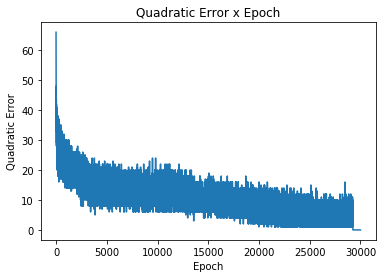

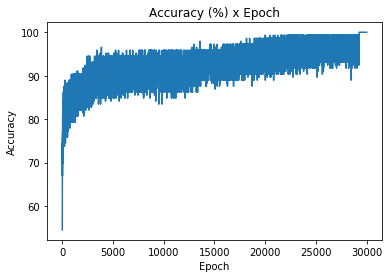

Weights:
[  9.60905518   1.08588279 -15.32648204  11.89767455  -3.91773424
   2.40970004 -13.91777109  -4.25811671   4.29495217   2.7207987
   2.07364293   9.64612701  -5.00930162  -2.97011207   3.66655558
  -2.53821086  -4.43810443   4.21458556   2.74254558  -3.26230244
   1.12538922   4.02230301  -3.59910878   7.55590663  -3.04067171
  -3.38814098   4.03716182  -2.92167616   2.89038049   3.34821128
  -7.34802821   4.05242761   1.87363372  -3.15165529   1.69195658
  -2.39503481  -2.91000392  -0.26168013   3.62461614  -5.27439802
   1.94821801   0.81583025   4.58746352  -2.05182994   2.82441135
   4.60972905 -12.1382122   17.10615552   8.50881981 -16.63352298
  18.42207516   6.93413947   9.8425041   10.14044425  -8.55681849
  -3.51161341  -1.81970735   3.01713008   5.32554163   5.27630807
  -4.93761954]
Confusion matrix on test database:
[[25  8]
 [ 8 22]]


In [18]:

class Neuron:
    
    # Constructor
    
    def __init__(self, n_inputs, lRate):
        self.lRate = lRate
        self.weights = np.random.rand(n_inputs + 1) * 0.2 - 0.1 # Num. features + 1 (bias)
    
    # Prediction

    def predict(self, inputs):
        activation = np.dot(np.append(inputs, 1.0), self.weights)
        return 1.0 if activation >= 0.0 else 0.0

    # Learn

    def learn(self, trainingSet_inputs, trainingSet_outputs, nEpoch):
        #weights = np.random.rand(61) * 0.2 - 0.1 # Num. features + 1 (bias)
        error_list = []
        accuracy_list = []
        for epoch in range(nEpoch):
            sumError = 0.0
            for inputs, output in zip(trainingSet_inputs, trainingSet_outputs) :
                prediction = self.predict(inputs)
                error = output - prediction
                sumError += error ** 2
                self.weights = self.weights + self.lRate * error * np.append(inputs, 1.0)
            error_list.append(sumError)
            accuracy = 100*(len(trainingSet_outputs)-sumError)/len(trainingSet_outputs)
            accuracy_list.append(accuracy)
            print ('Epoch %d Error: %.3f Accuracy: %.3f (%%)' % (epoch+1,sumError, accuracy))
        plt.plot(error_list)
        plt.title('Quadratic Error x Epoch')
        plt.ylabel('Quadratic Error')
        plt.xlabel('Epoch')
        fig = plt.gcf() # stores figure to save it
        fig.savefig('error.png')
        plt.show()
        plt.plot(accuracy_list)
        plt.title('Accuracy (%) x Epoch')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        fig = plt.gcf() # stores figure to save it
        fig.savefig('accuracy.png')
        plt.show()
        return self.weights

# Main (Single neuron Perceptron)

#train_data = np.array(train_df)
#test_data = np.array(test_df)
lRate   = 0.04
nEpoch  = 30000
n_inputs = len(X_train[0])
perceptron = Neuron(n_inputs, lRate)
weights = perceptron.learn(X_train, y_train, nEpoch)
print ('Weights:\n{}'.format(weights))
y_pred = []
for row in X_test:
    y_pred.append(perceptron.predict(row))

cm      = confusion_matrix(y_test, y_pred)
#cr      = classification_report(y_test, y_pred) 
print('Confusion matrix on test database:\n{}'.format(cm))
#print('Classification report on test database:\n{}'.format(cr))